In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
%load_ext autoreload
%autoreload 2
import pipeline_classification

# CREATE DATAFRAME

In [4]:
FILES = ['cleaned_data/cambodia_2014_cleaned.csv', 
         'cleaned_data/Maldives_2016_cleaned.csv', 
         'cleaned_data/Nepal_2016_cleaned.csv',
         'cleaned_data/Pakistan_2017_cleaned.csv',
         'cleaned_data/Philippines_2017_cleaned.csv']

COUNTRY_DATA = {
    'Cambodia': 'cleaned_data/cambodia_2014_cleaned.csv', 
    'Maldives': 'cleaned_data/Maldives_2016_cleaned.csv', 
    'Nepal': 'cleaned_data/Nepal_2016_cleaned.csv',
    'Pakistan': 'cleaned_data/Pakistan_2017_cleaned.csv',
    'Philippines': 'cleaned_data/Philippines_2017_cleaned.csv'   
}

In [5]:
def create_df_each_country():
    
    df_dic = {}
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df_dic[country] = df
        
        if 'country' in df.columns:
            df.drop(columns=['country'],inplace=True)
    return df_dic

In [6]:
def create_df_all_countries():
    
    df_dic={}
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df['country'] = country        
        df_dic[country] = df
                 
    df = pd.concat(df_dic.values(), ignore_index=True)
    return df

In [7]:
#create dataframe containing all 5 countries
df = create_df_all_countries()

In [8]:
#create dataframe for each country

df_dic = create_df_each_country()

df_Cambodia = df_dic['Cambodia']
df_Maldives = df_dic['Maldives']
df_Nepal = df_dic['Nepal']
df_Pakistan = df_dic['Pakistan']
df_Philippines = df_dic['Philippines']

# CREATE FETURES AND TAGETS

In [9]:
#need hot-code
need_one_hot=['if_urban','wealth_index','if_earn_more','sex_head_household', \
              'partner_ideal_child','money_decide_person','country']

#already dummy
dummy=['if_own_house','if_employment_current']

#need normalize
need_normalize=['age','education','num_household','num_child','partner_edu']

#all features to be analyzed
features_col = need_normalize + dummy + need_one_hot

#all targets to be analyzed
target_col=['if_emo_vio', 'if_phy_vio', 'if_sex_vio', 'if_vio'] 

<AxesSubplot:>

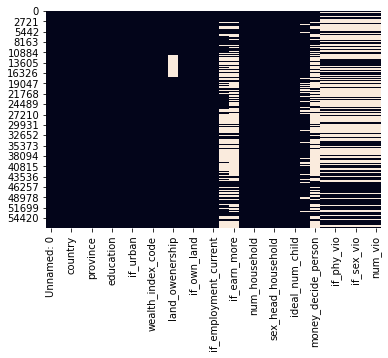

In [10]:
# visulize the None value distribution
pipeline_classification.plot_df_na(df)

# Analyze all countries by LogisticRegression

In [11]:
# drop observations that have None in targets and categorical attributes

pipeline_classification.drop_na(df, target_col+need_one_hot+dummy)

In [12]:
# create dataframes for features and targets

features, target = pipeline_classification.preprocess_data(df, features_col, target_col, need_one_hot)

In [13]:
# split data

X_train, X_test, y_train, y_test = pipeline_classification.split_data(features, target, need_normalize)

In [14]:
# impute None values

X_train, X_test = pipeline_classification.impute_missing_median(X_train, X_test)

In [15]:
y_train1 = y_train['if_emo_vio']
y_train2 = y_train['if_phy_vio']
y_train3 = y_train['if_sex_vio']
y_train4 = y_train['if_vio']

y_test1 = y_test['if_emo_vio']
y_test2 = y_test['if_phy_vio']
y_test3 = y_test['if_sex_vio']
y_test4 = y_test['if_vio']

## Target 1: if have emotional violence

In [16]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train1,'All', 'if_emo_vio')

In [17]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.341284,0.699944,0.297570,0.400409,0.633795
1,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.250019,0.759409,0.318910,0.206895,0.625862
2,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.196120,0.779593,0.338638,0.138624,0.623778
3,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.184464,0.781640,0.339024,0.127366,0.623599
4,All,if_emo_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.186921,0.781912,0.340986,0.129474,0.623878


In [18]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [19]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train1, 'All', 'if_emo_vio')

In [20]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.002797,0.806056,0.200000,0.001408,0.643090
1,All,if_emo_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.008249,0.804829,0.261667,0.004220,0.644100
2,All,if_emo_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.011027,0.804829,0.406667,0.005629,0.643770
3,All,if_emo_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.011008,0.804556,0.373333,0.005629,0.643898
4,All,if_emo_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.010998,0.804420,0.356667,0.005629,0.643922


In [21]:
best_model1

LogisticRegression(C=1, random_state=0)

{'f1': 0.0,
 'accuracy': 0.7977099236641222,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

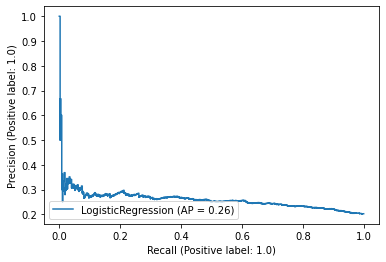

In [22]:
pipeline_classification.evaluate_test(best_model, X_test, y_test1)

In [23]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.973984,0.973984
13,wealth_index_richest,-0.929166,0.929166
12,wealth_index_richer,-0.801109,0.801109
29,country_Nepal,-0.791826,0.791826
20,partner_ideal_child_both want same,-0.777822,0.777822
25,money_decide_person_respondent and husband/par...,-0.728807,0.728807
22,partner_ideal_child_husband wants more,-0.724609,0.724609
9,wealth_index_middle,-0.723828,0.723828
18,sex_head_household_female,-0.711105,0.711105
17,if_earn_more_more than him,-0.675836,0.675836


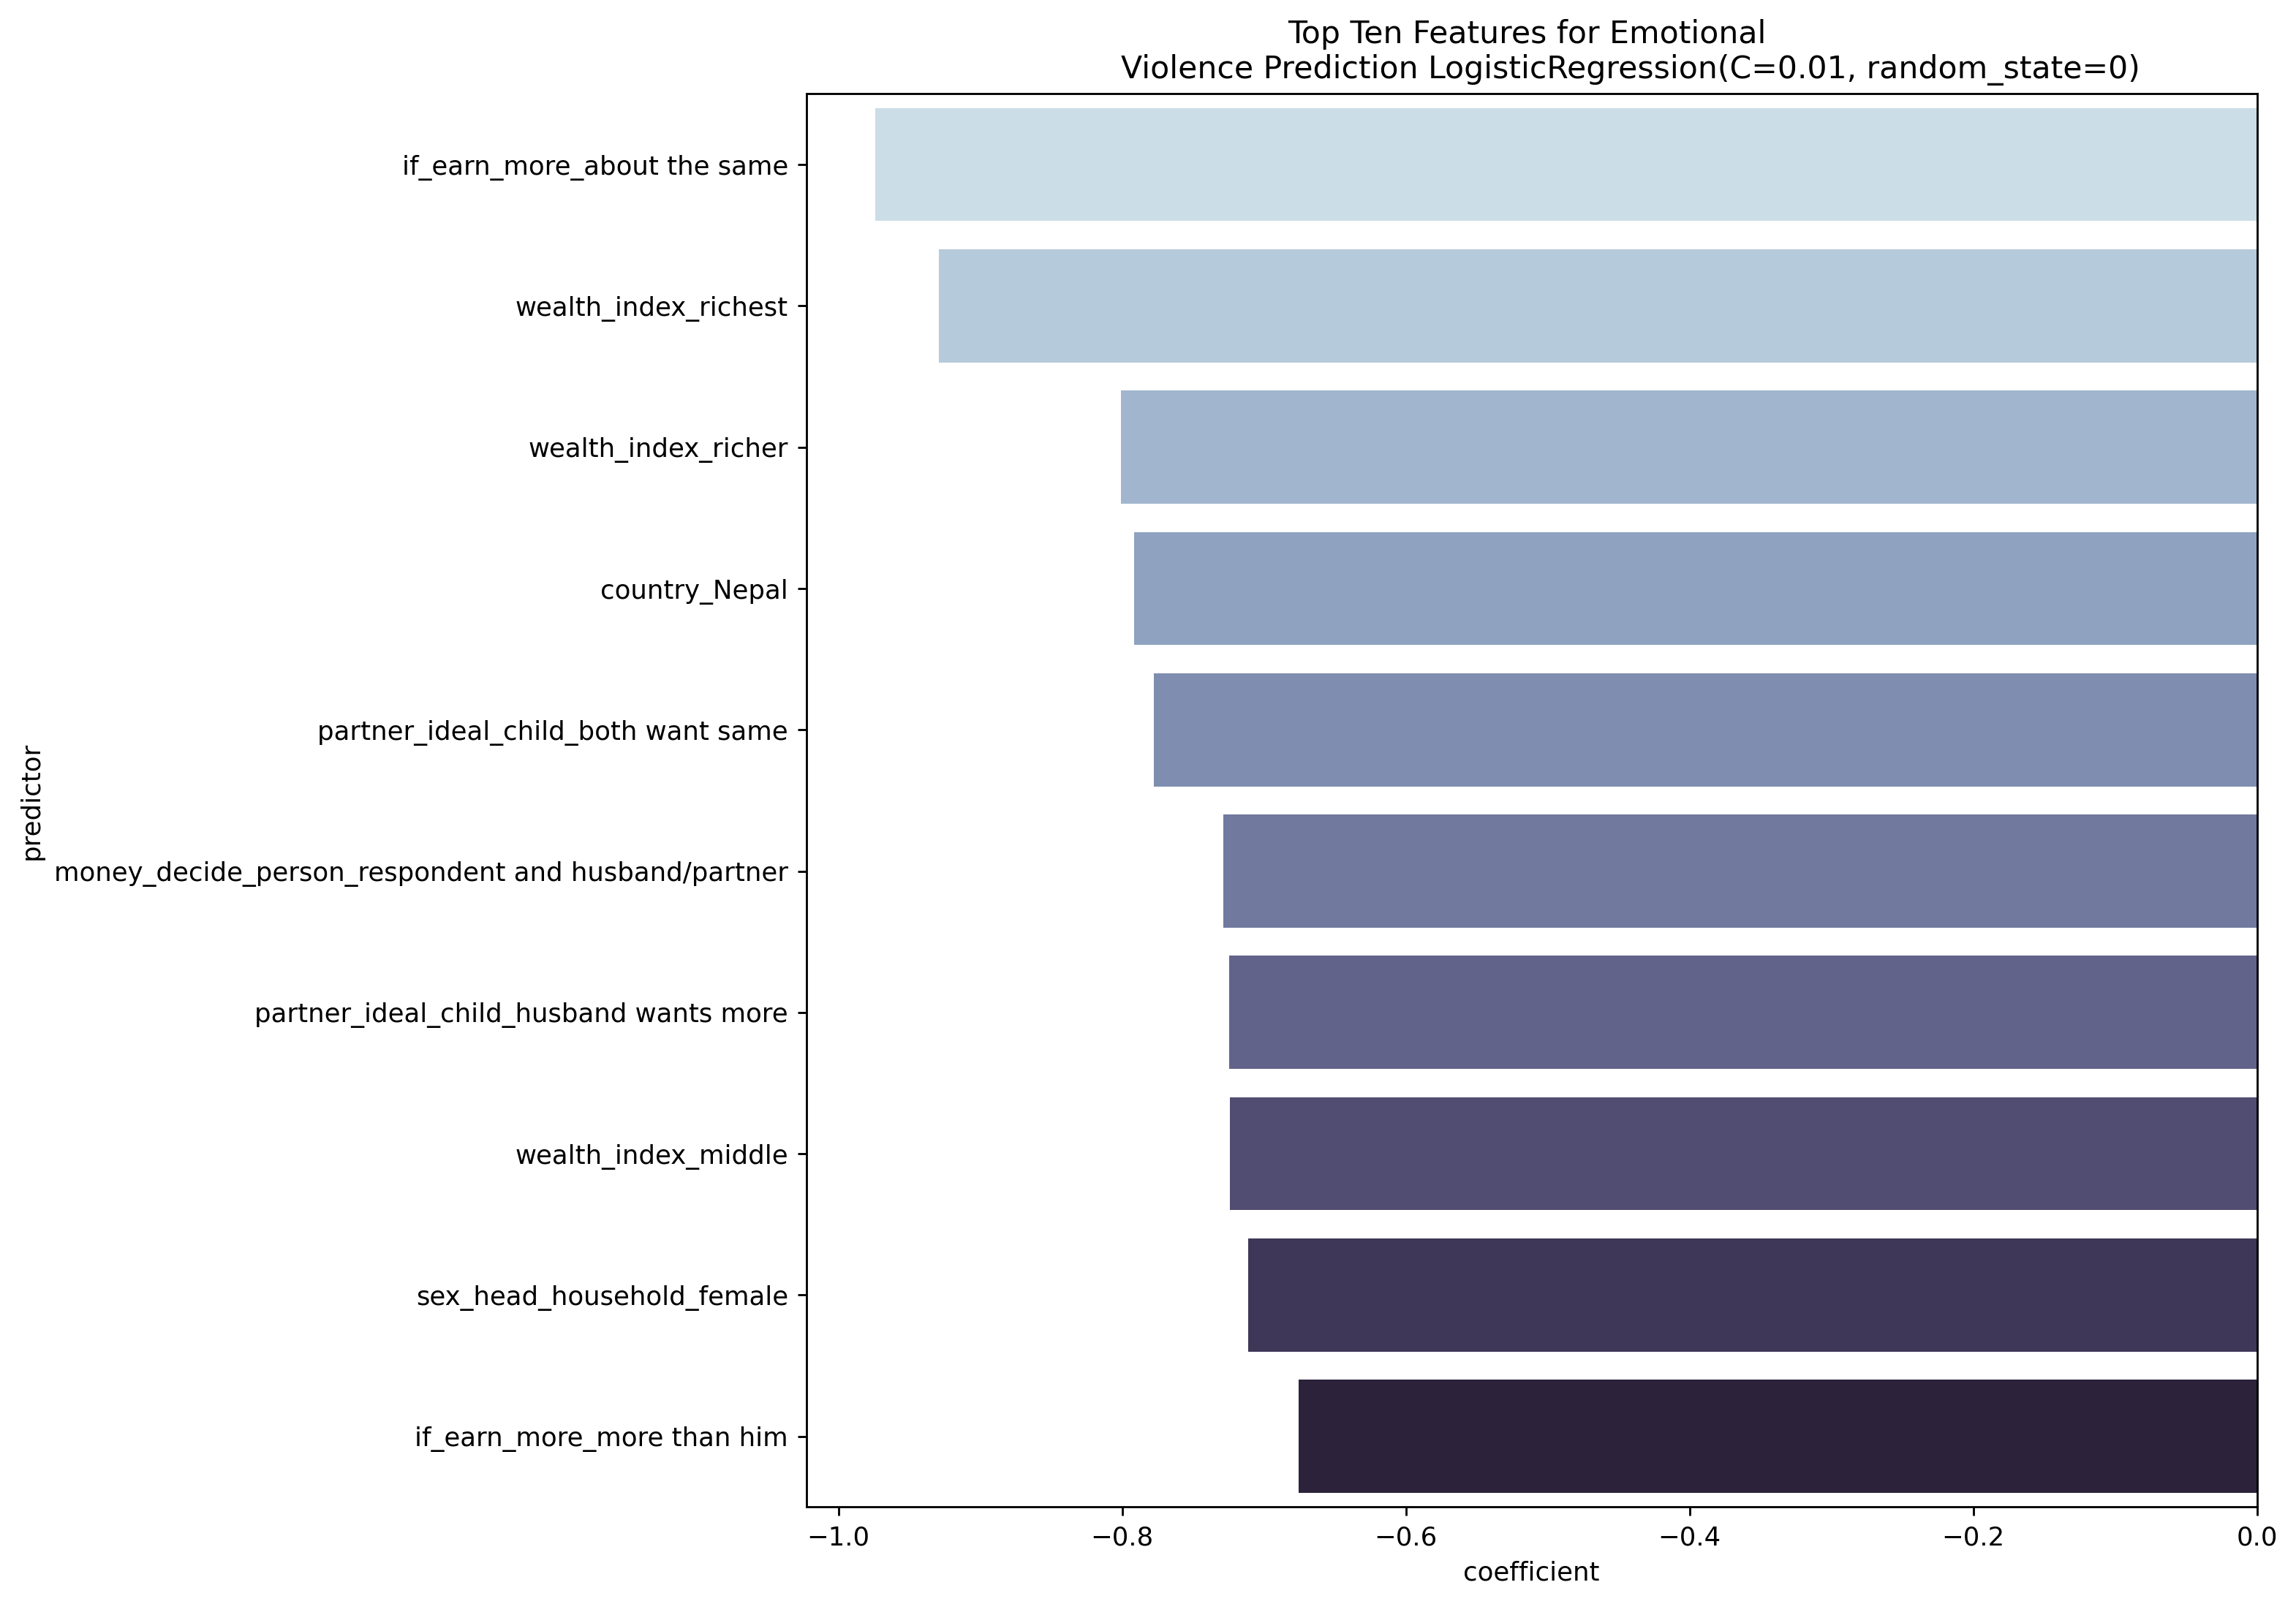

In [24]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

## Target 2: if have physical violence

In [25]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train2,'All', 'if_phy_vio')

In [26]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.282977,0.767322,0.232241,0.363090,0.664174
1,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.224562,0.843971,0.304806,0.178845,0.654272
2,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.165025,0.859792,0.341502,0.109864,0.650554
3,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.151207,0.859792,0.330005,0.099100,0.649410
4,All,if_phy_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.145892,0.859656,0.326883,0.094799,0.649302


In [27]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [28]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train2, 'All', 'if_phy_vio')

In [29]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.004255,0.873568,0.200000,0.002151,0.675577
1,All,if_phy_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.012633,0.873568,0.316667,0.006463,0.674768
2,All,if_phy_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.674138
3,All,if_phy_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.673481
4,All,if_phy_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.014693,0.873432,0.333333,0.007539,0.673400


In [30]:
best_model1

LogisticRegression(C=1, random_state=0)

{'f1': 0.0,
 'accuracy': 0.8625954198473282,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

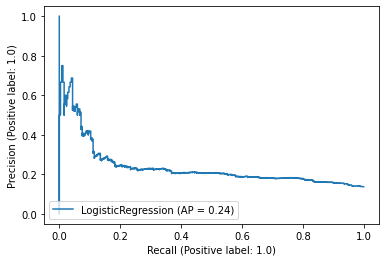

In [31]:
pipeline_classification.evaluate_test(best_model, X_test, y_test2)

In [32]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
20,partner_ideal_child_both want same,-1.031115,1.031115
13,wealth_index_richest,-1.011025,1.011025
14,if_earn_more_about the same,-1.004885,1.004885
25,money_decide_person_respondent and husband/par...,-0.989633,0.989633
12,wealth_index_richer,-0.941920,0.941920
18,sex_head_household_female,-0.840583,0.840583
9,wealth_index_middle,-0.814653,0.814653
22,partner_ideal_child_husband wants more,-0.814487,0.814487
10,wealth_index_poorer,-0.808649,0.808649
21,partner_ideal_child_husband wants fewer,-0.733161,0.733161


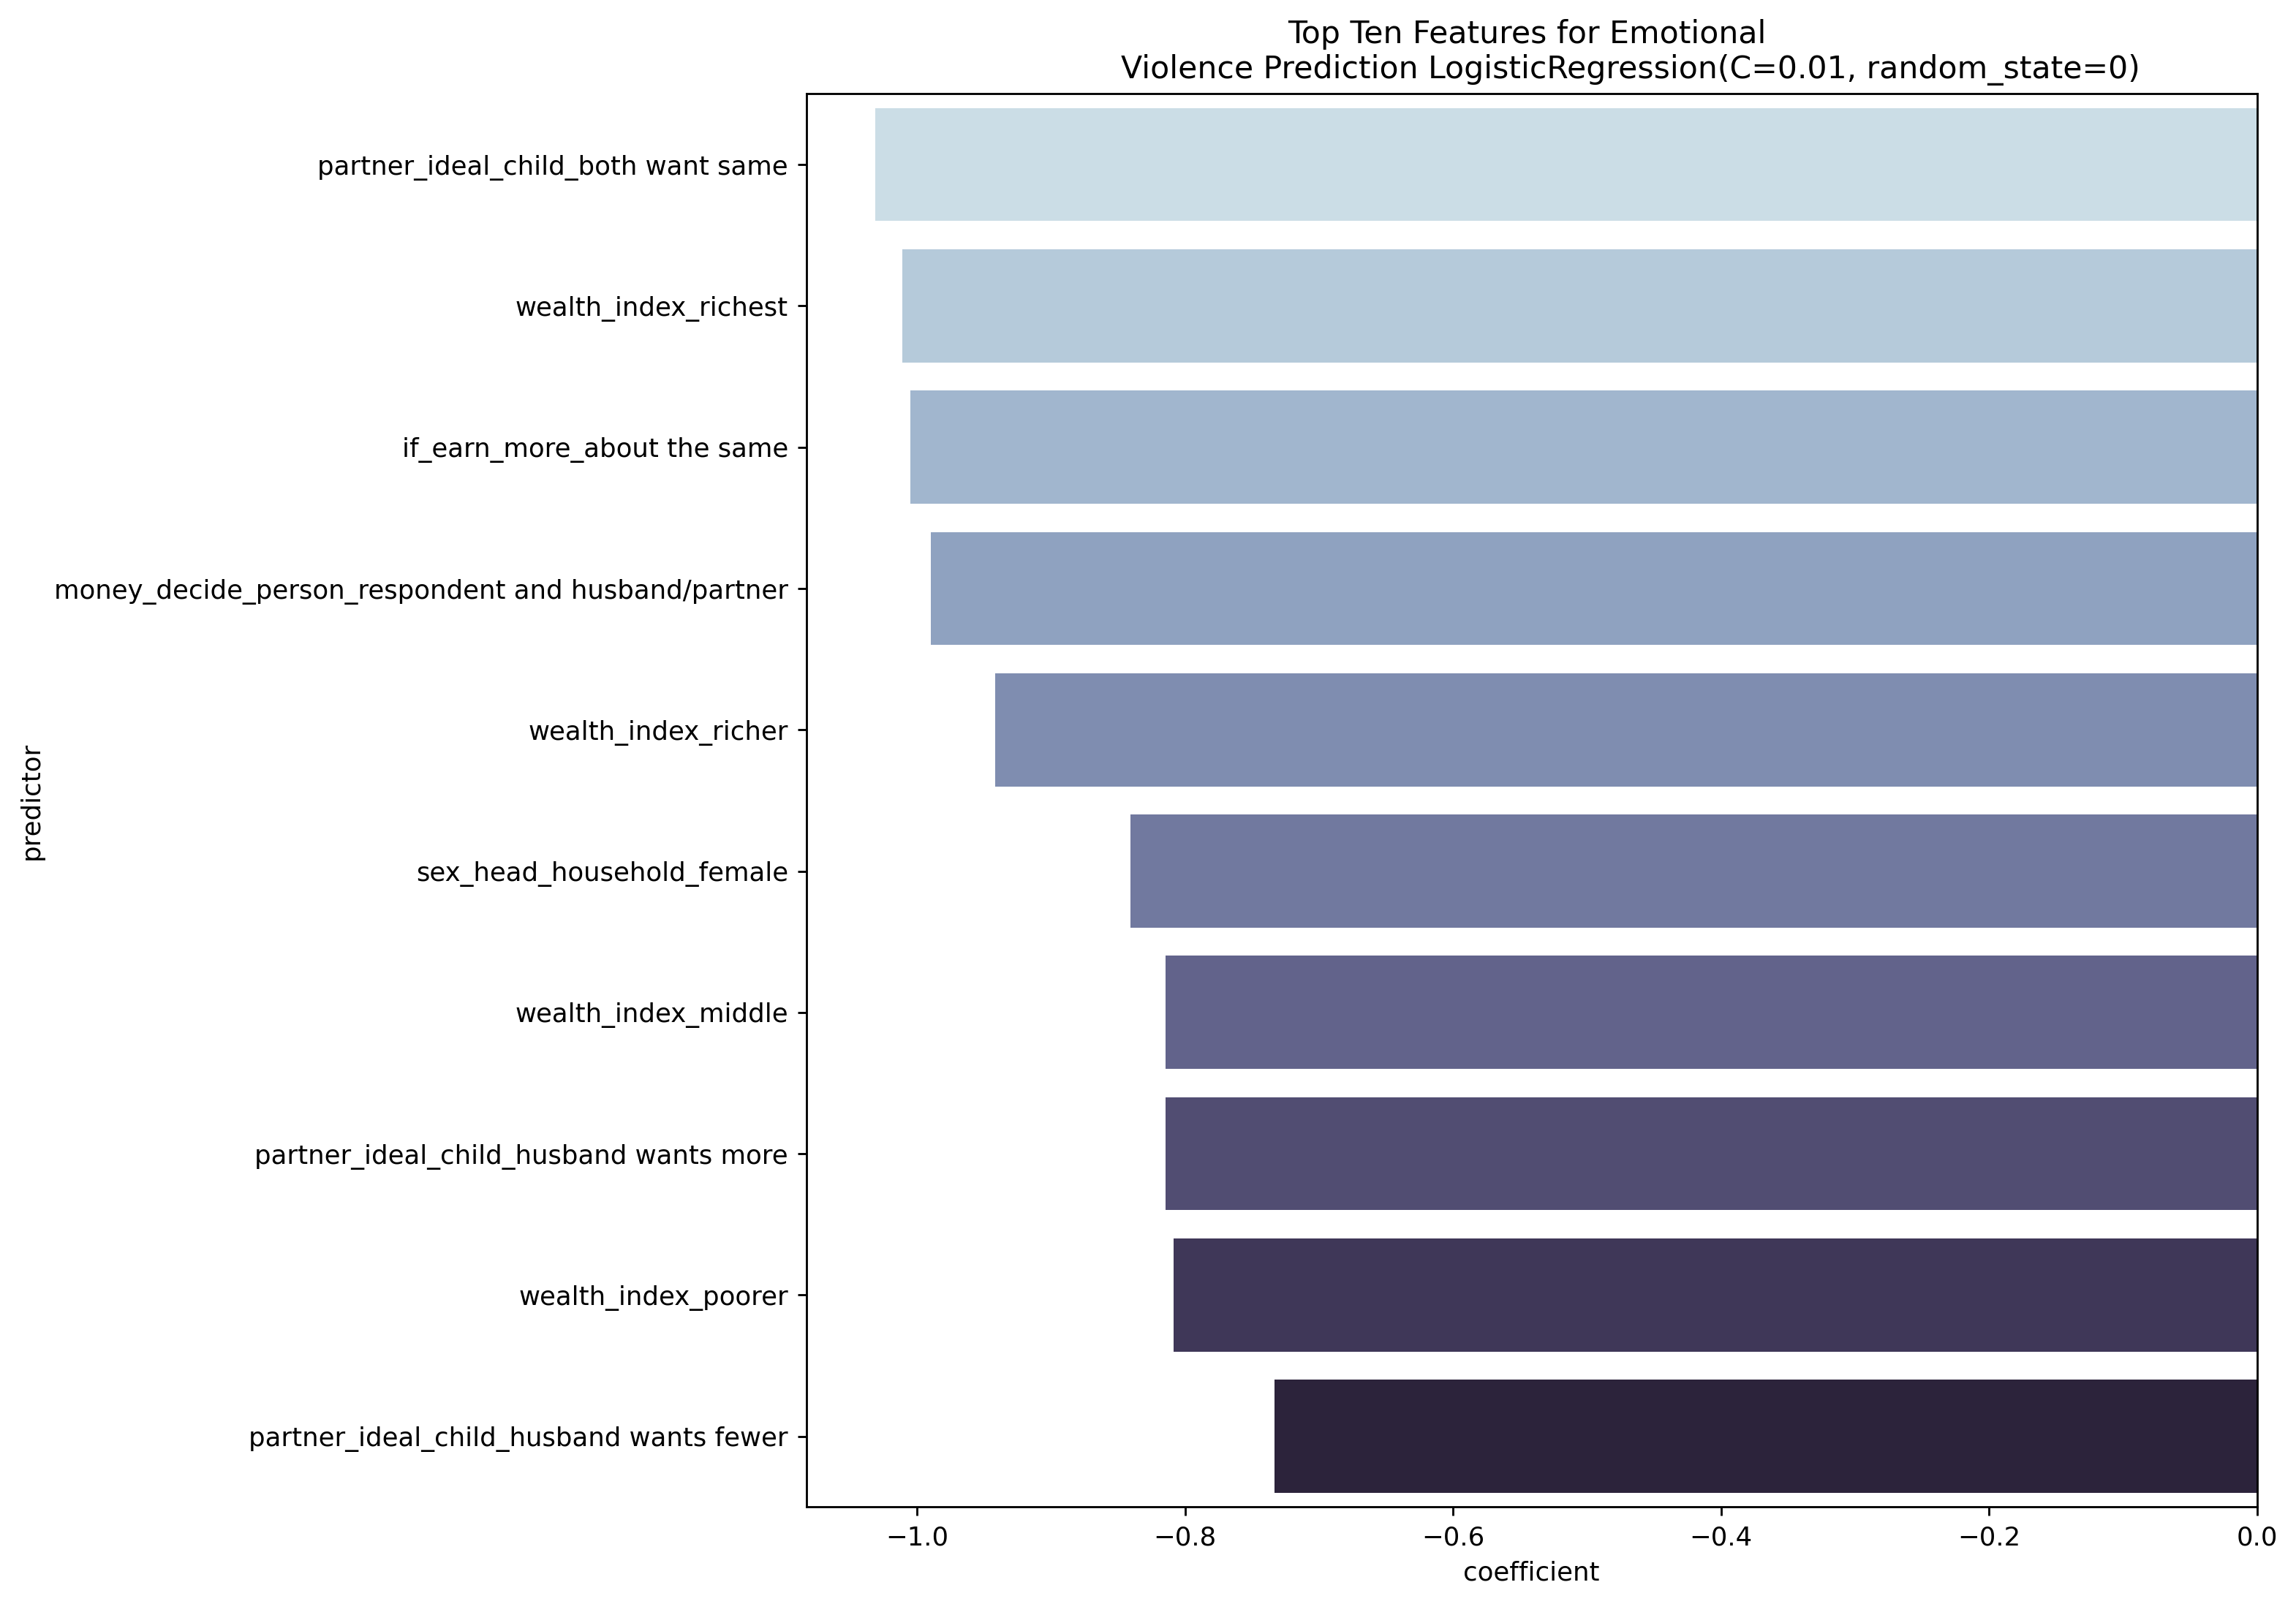

In [33]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

## Target 3: if have sexual violence

In [34]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train3, 'All', 'if_sex_vio')

In [35]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.141083,0.898388,0.105734,0.215148,0.671449
1,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.071896,0.951172,0.140167,0.048645,0.655593
2,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.036062,0.957310,0.153333,0.020813,0.646600
3,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.030001,0.957037,0.128333,0.017365,0.640685
4,All,if_sex_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.036062,0.957583,0.153333,0.020813,0.640405


In [36]:
best_model

LogisticRegression(C=0.01, random_state=0)

In [37]:
result1, best_model1 = pipeline_classification.train_logistic_regression(X_train, y_train3, 'All', 'if_sex_vio')

In [38]:
result1

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vio,LogisticRegression,"{'C': 0.01, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.691227
1,All,if_sex_vio,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.693136
2,All,if_sex_vio,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692227
3,All,if_sex_vio,LogisticRegression,"{'C': 10, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692038
4,All,if_sex_vio,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.0,0.96072,0.0,0.0,0.692044


In [39]:
best_model1

LogisticRegression(C=0.01, random_state=0)

{'f1': 0.0,
 'accuracy': 0.9547437295528899,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

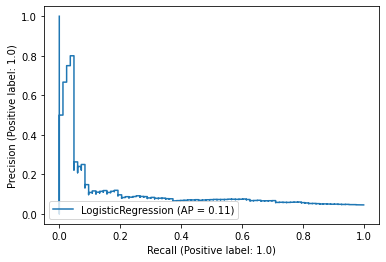

In [40]:
pipeline_classification.evaluate_test(best_model, X_test, y_test3)

In [41]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
20,partner_ideal_child_both want same,-1.306818,1.306818
14,if_earn_more_about the same,-1.301182,1.301182
25,money_decide_person_respondent and husband/par...,-1.268047,1.268047
13,wealth_index_richest,-1.190730,1.190730
28,country_Maldives,-1.184997,1.184997
12,wealth_index_richer,-1.169614,1.169614
9,wealth_index_middle,-1.112968,1.112968
21,partner_ideal_child_husband wants fewer,-1.092709,1.092709
8,if_urban_urban,-1.089659,1.089659
11,wealth_index_poorest,-1.059429,1.059429


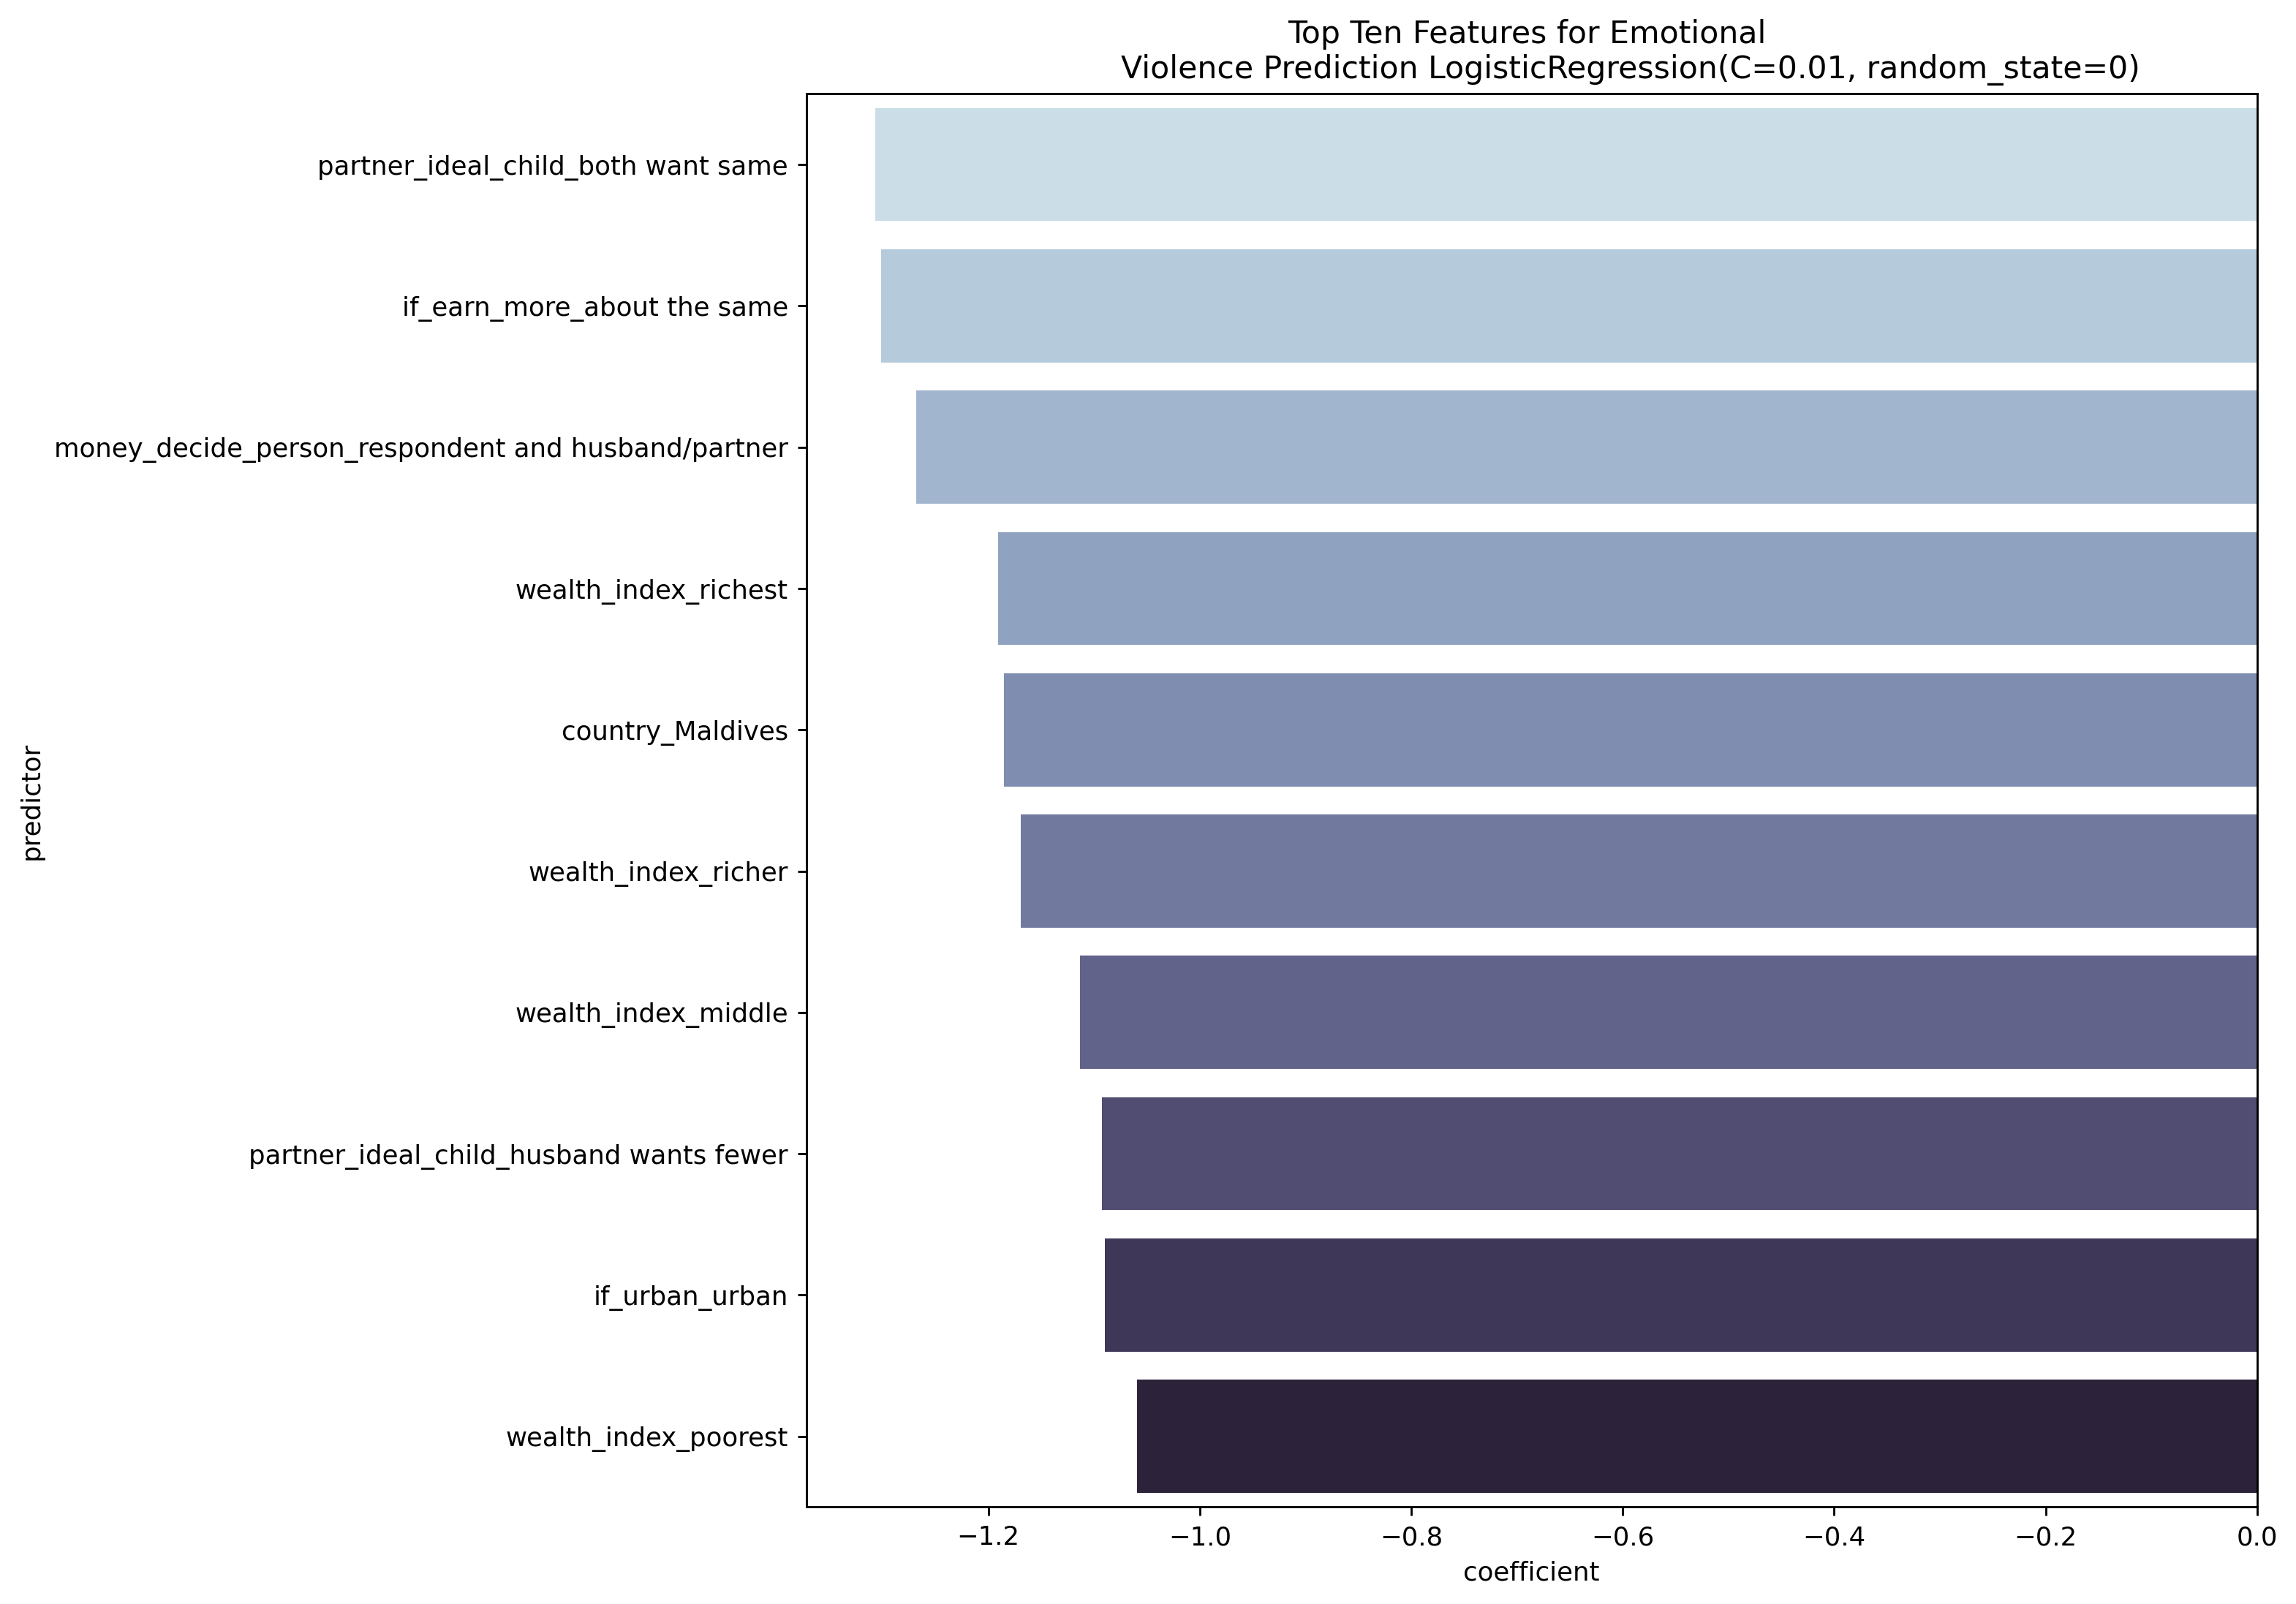

In [42]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

# Target 4: if have violence

In [43]:
# Use SMOTE to deal with inbalanced data

result, best_model = pipeline_classification.train_logistic_regression_SMOTE(X_train, y_train4, 'All', 'if_vio')

In [44]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vio,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.405476,0.669121,0.356860,0.469886,0.642392
1,All,if_vio,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.313716,0.714264,0.371430,0.272159,0.634936
2,All,if_vio,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.252651,0.732679,0.386305,0.188636,0.632903
3,All,if_vio,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.235569,0.733361,0.380008,0.171591,0.632504
4,All,if_vio,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.234425,0.733361,0.378800,0.170455,0.632136


In [45]:
best_model

LogisticRegression(C=0.01, random_state=0)

{'f1': 0.0,
 'accuracy': 0.7453653217011995,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

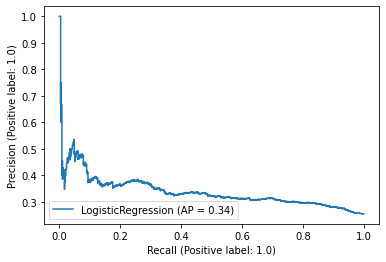

In [46]:
pipeline_classification.evaluate_test(best_model, X_test, y_test4)

In [47]:
coeffs = pipeline_classification.get_important_attributes(X_train.columns, best_model)
coeffs

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.856830,0.856830
13,wealth_index_richest,-0.769284,0.769284
20,partner_ideal_child_both want same,-0.756609,0.756609
12,wealth_index_richer,-0.643705,0.643705
25,money_decide_person_respondent and husband/par...,-0.617113,0.617113
18,sex_head_household_female,-0.613481,0.613481
22,partner_ideal_child_husband wants more,-0.590289,0.590289
9,wealth_index_middle,-0.561150,0.561150
17,if_earn_more_more than him,-0.524017,0.524017
8,if_urban_urban,-0.501790,0.501790


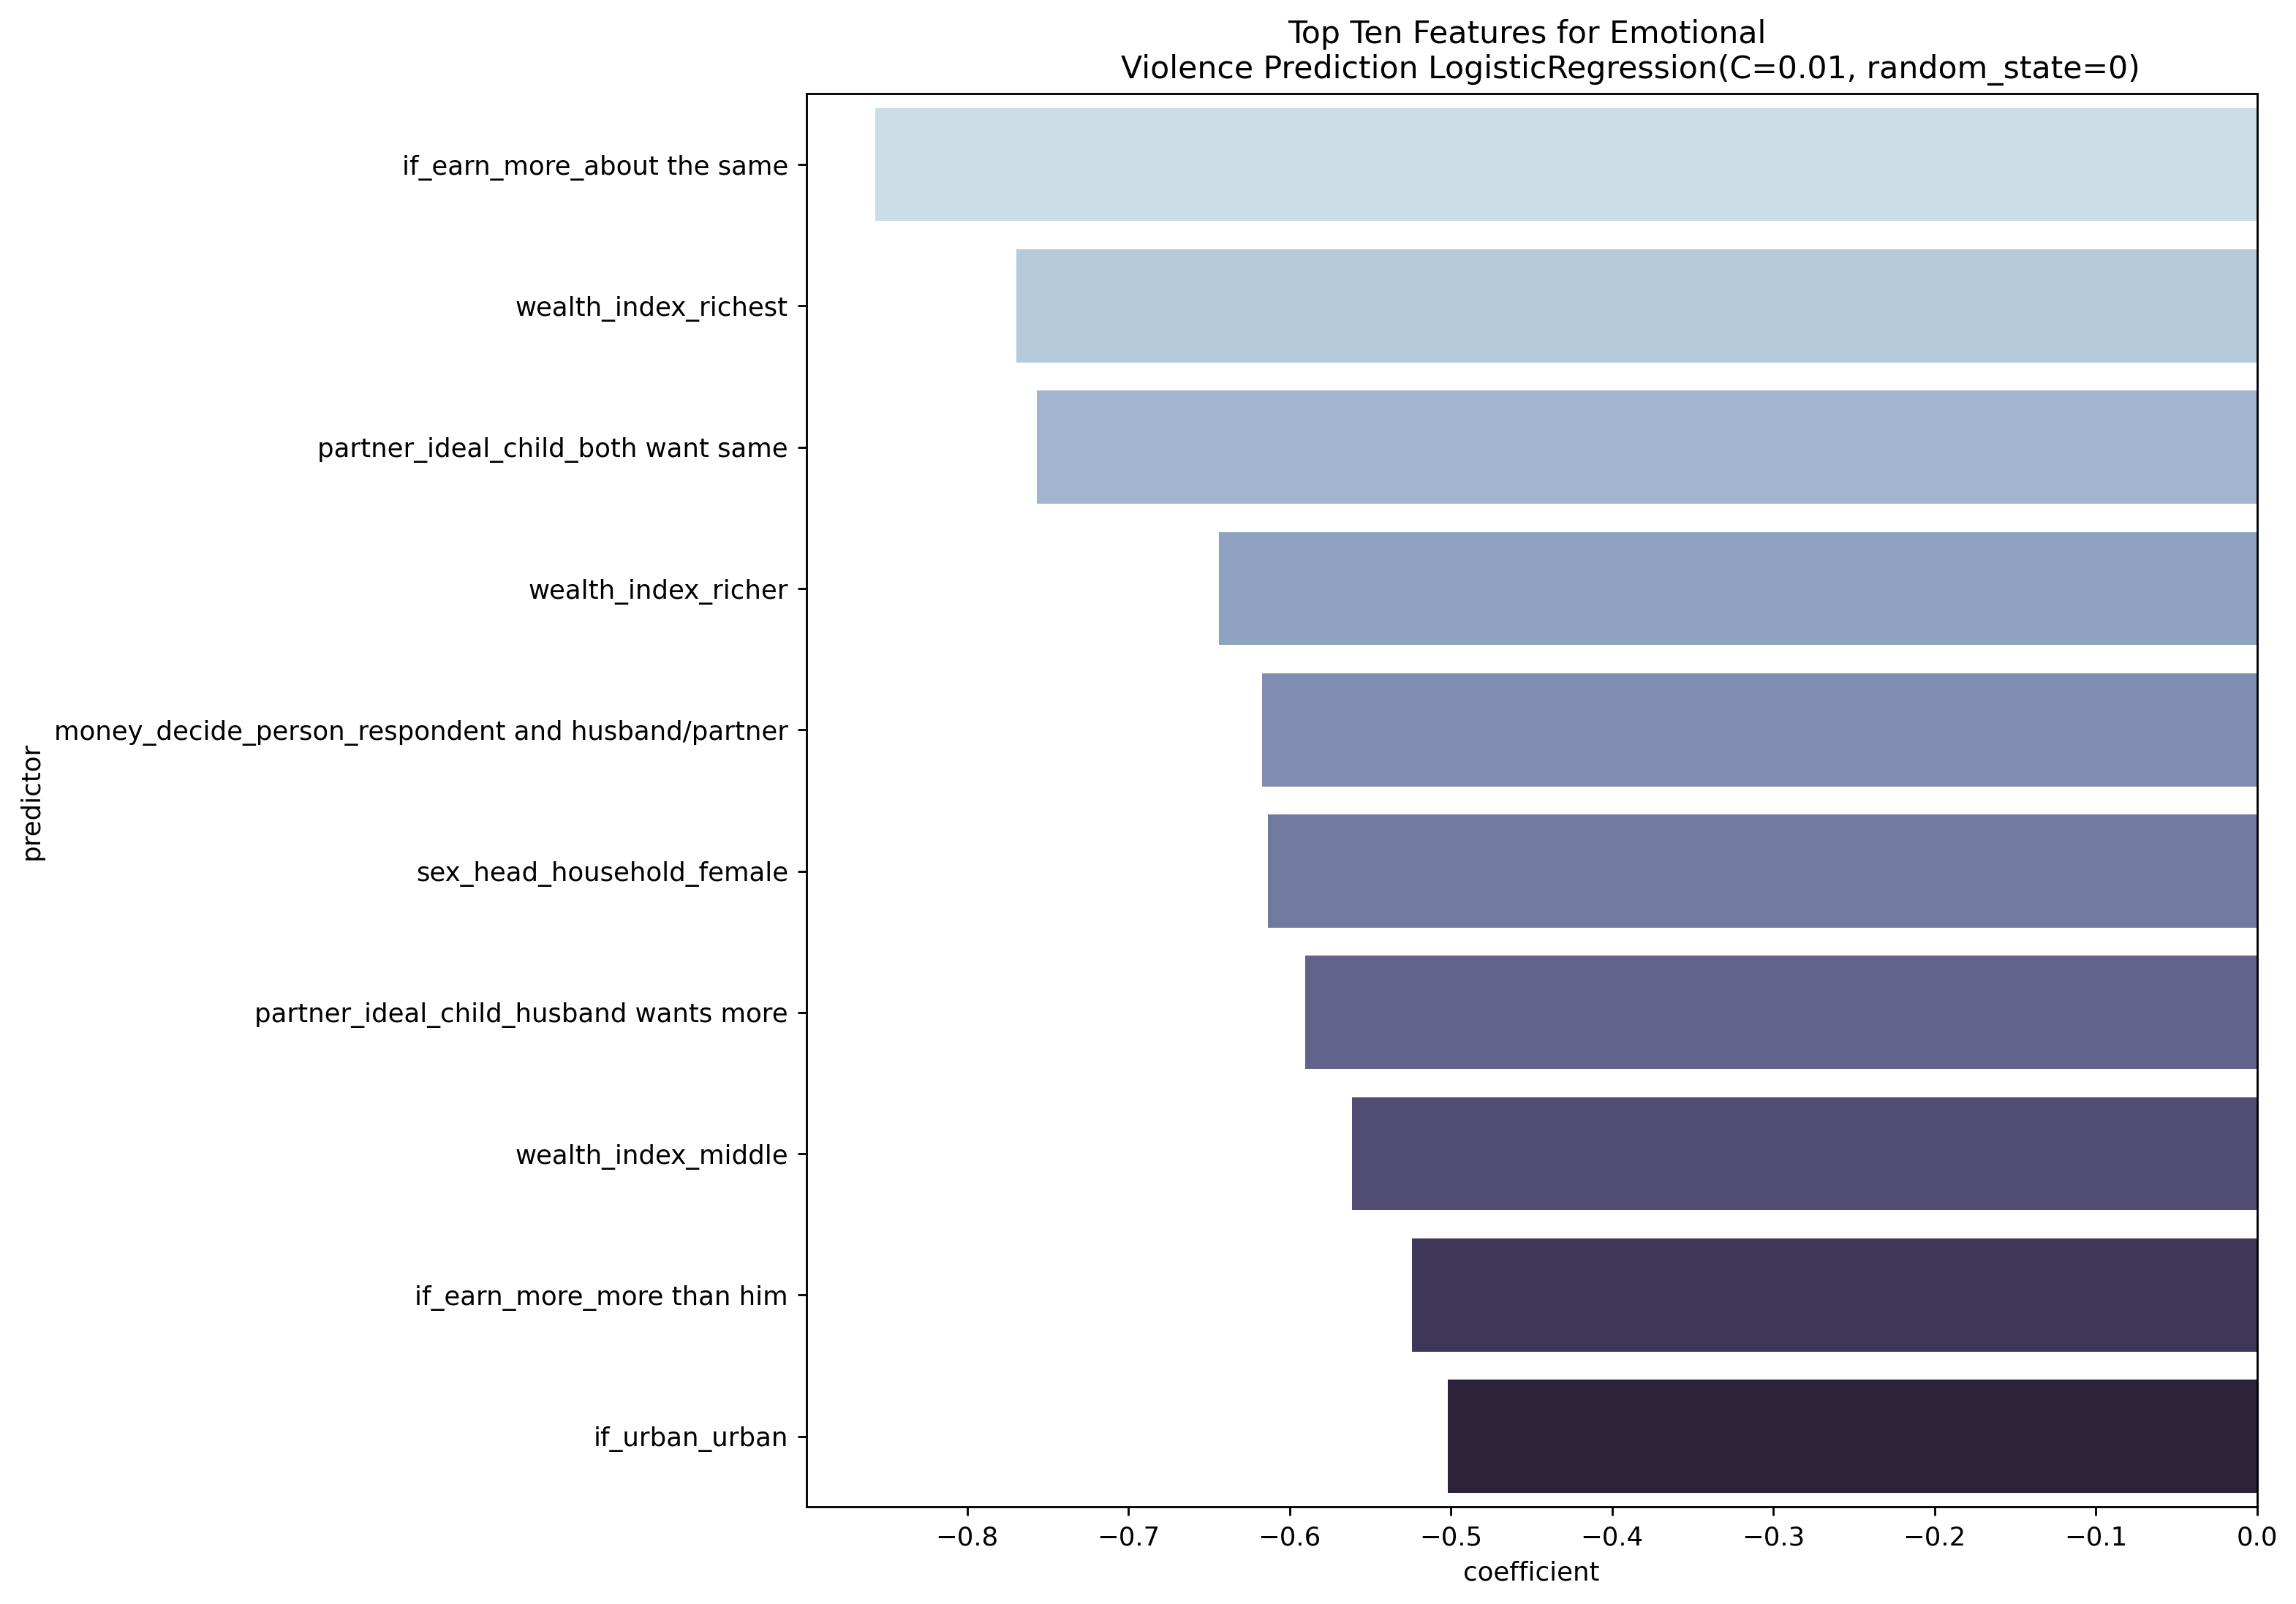

In [48]:
pipeline_classification.plot_top10_attributes(coeffs, best_model)

# Analyze Cambodia

In [56]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
                (df_Cambodia, features_col, target_col, dummy, need_one_hot, need_normalize, all=False)

y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4 = \
                                    pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

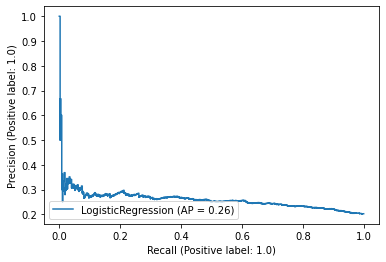

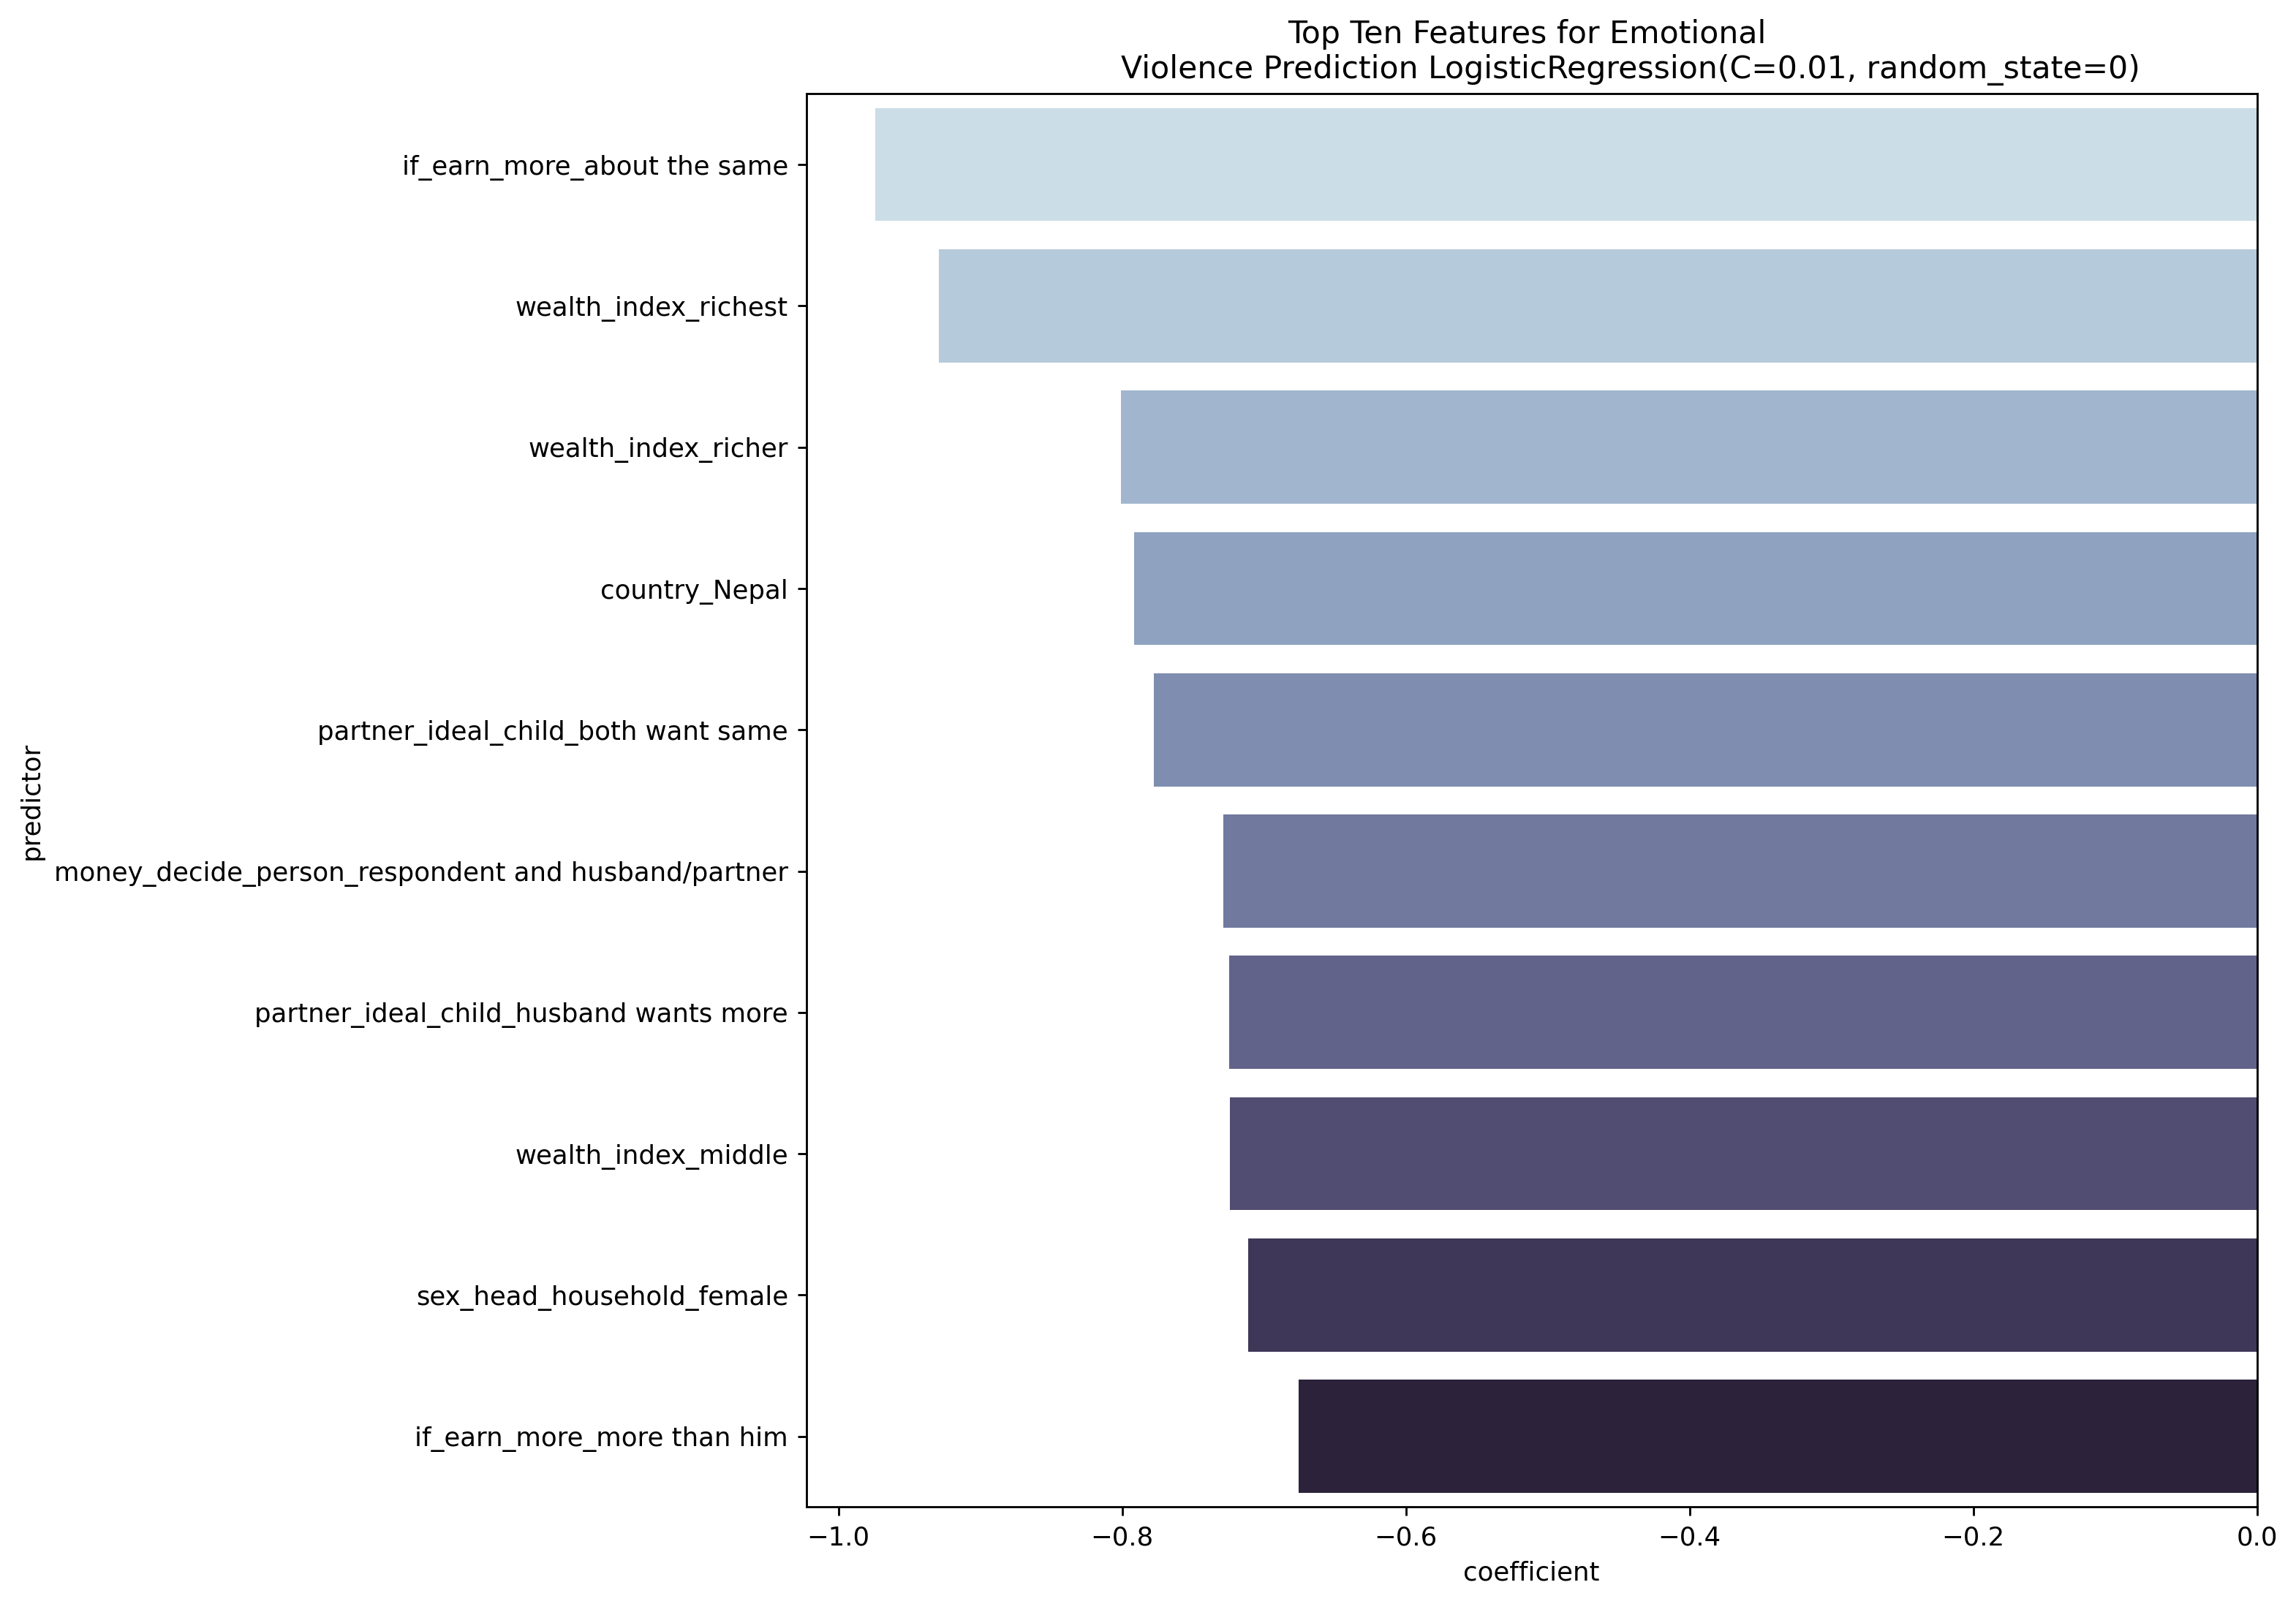

In [94]:
result, eval, coeffs = pipeline_classification.analyze_country(X_train, X_test, y_train1, y_test1, 'Cambodia', 'if_emo_vil','LR')

In [95]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.341284,0.699944,0.297570,0.400409,0.633795
1,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.250019,0.759409,0.318910,0.206895,0.625862
2,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.196120,0.779593,0.338638,0.138624,0.623778
3,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.184464,0.781640,0.339024,0.127366,0.623599
4,Cambodia,if_emo_vil,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.186921,0.781912,0.340986,0.129474,0.623878


In [96]:
eval

{'f1': 0.0,
 'accuracy': 0.7977099236641222,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

In [97]:
coeffs[:10]

,predictor,coefficient,abs_coeffient
14,if_earn_more_about the same,-0.973984,0.973984
13,wealth_index_richest,-0.929166,0.929166
12,wealth_index_richer,-0.801109,0.801109
29,country_Nepal,-0.791826,0.791826
20,partner_ideal_child_both want same,-0.777822,0.777822
25,money_decide_person_respondent and husband/par...,-0.728807,0.728807
22,partner_ideal_child_husband wants more,-0.724609,0.724609
9,wealth_index_middle,-0.723828,0.723828
18,sex_head_household_female,-0.711105,0.711105
17,if_earn_more_more than him,-0.675836,0.675836


## Target 2: if have physical violence

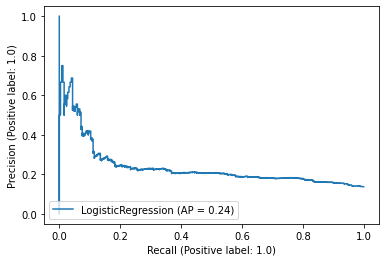

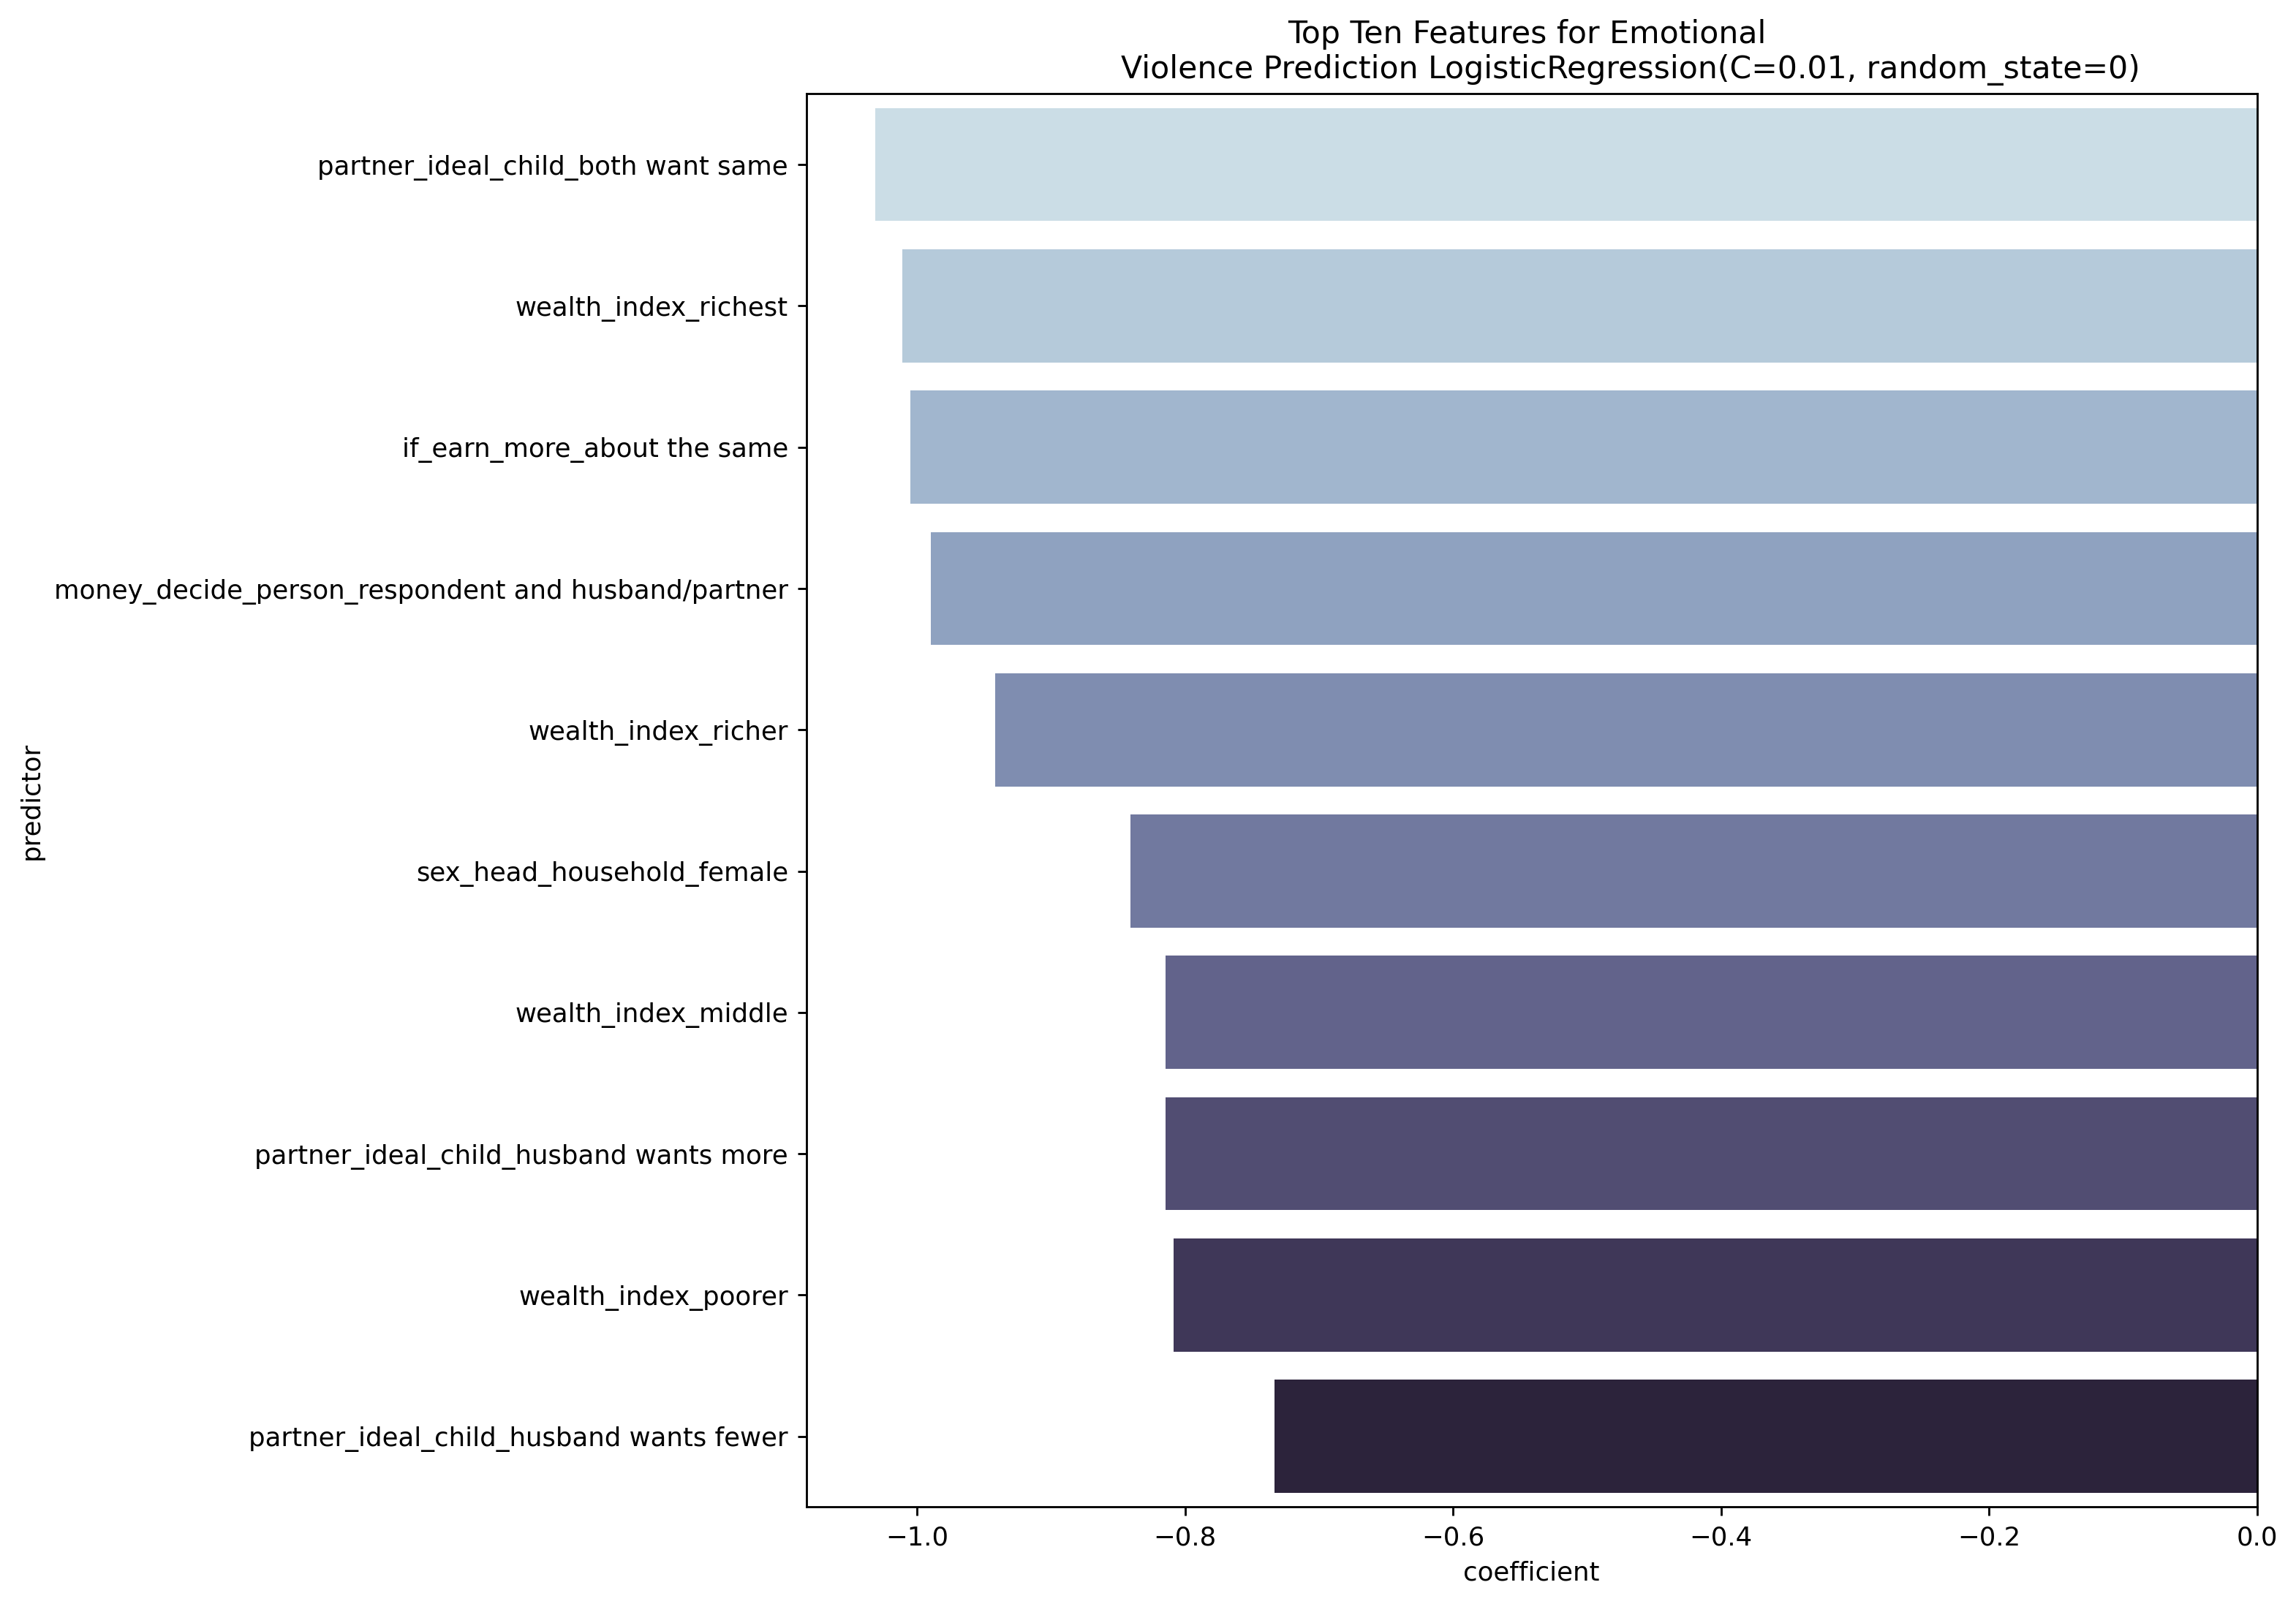

In [98]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'Cambodia', 'if_phy_vil', 'LR')

In [99]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 0.01, 'logisticregre...",0.282977,0.767322,0.232241,0.363090,0.664174
1,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.224562,0.843971,0.304806,0.178845,0.654272
2,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 1, 'logisticregressi...",0.165025,0.859792,0.341502,0.109864,0.650554
3,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.151207,0.859792,0.330005,0.099100,0.649410
4,Cambodia,if_phy_vil,LogisticRegression,"{'logisticregression__C': 100, 'logisticregres...",0.145892,0.859656,0.326883,0.094799,0.649302


In [100]:
eval

{'f1': 0.0,
 'accuracy': 0.8625954198473282,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

In [101]:
coeffs[:10]

,predictor,coefficient,abs_coeffient
20,partner_ideal_child_both want same,-1.031115,1.031115
13,wealth_index_richest,-1.011025,1.011025
14,if_earn_more_about the same,-1.004885,1.004885
25,money_decide_person_respondent and husband/par...,-0.989633,0.989633
12,wealth_index_richer,-0.941920,0.941920
18,sex_head_household_female,-0.840583,0.840583
9,wealth_index_middle,-0.814653,0.814653
22,partner_ideal_child_husband wants more,-0.814487,0.814487
10,wealth_index_poorer,-0.808649,0.808649
21,partner_ideal_child_husband wants fewer,-0.733161,0.733161


## Target 3: if have sexual violence

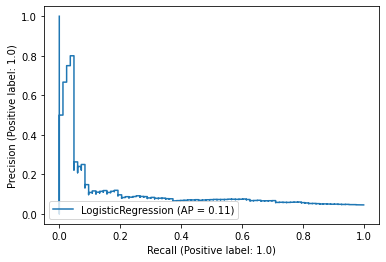

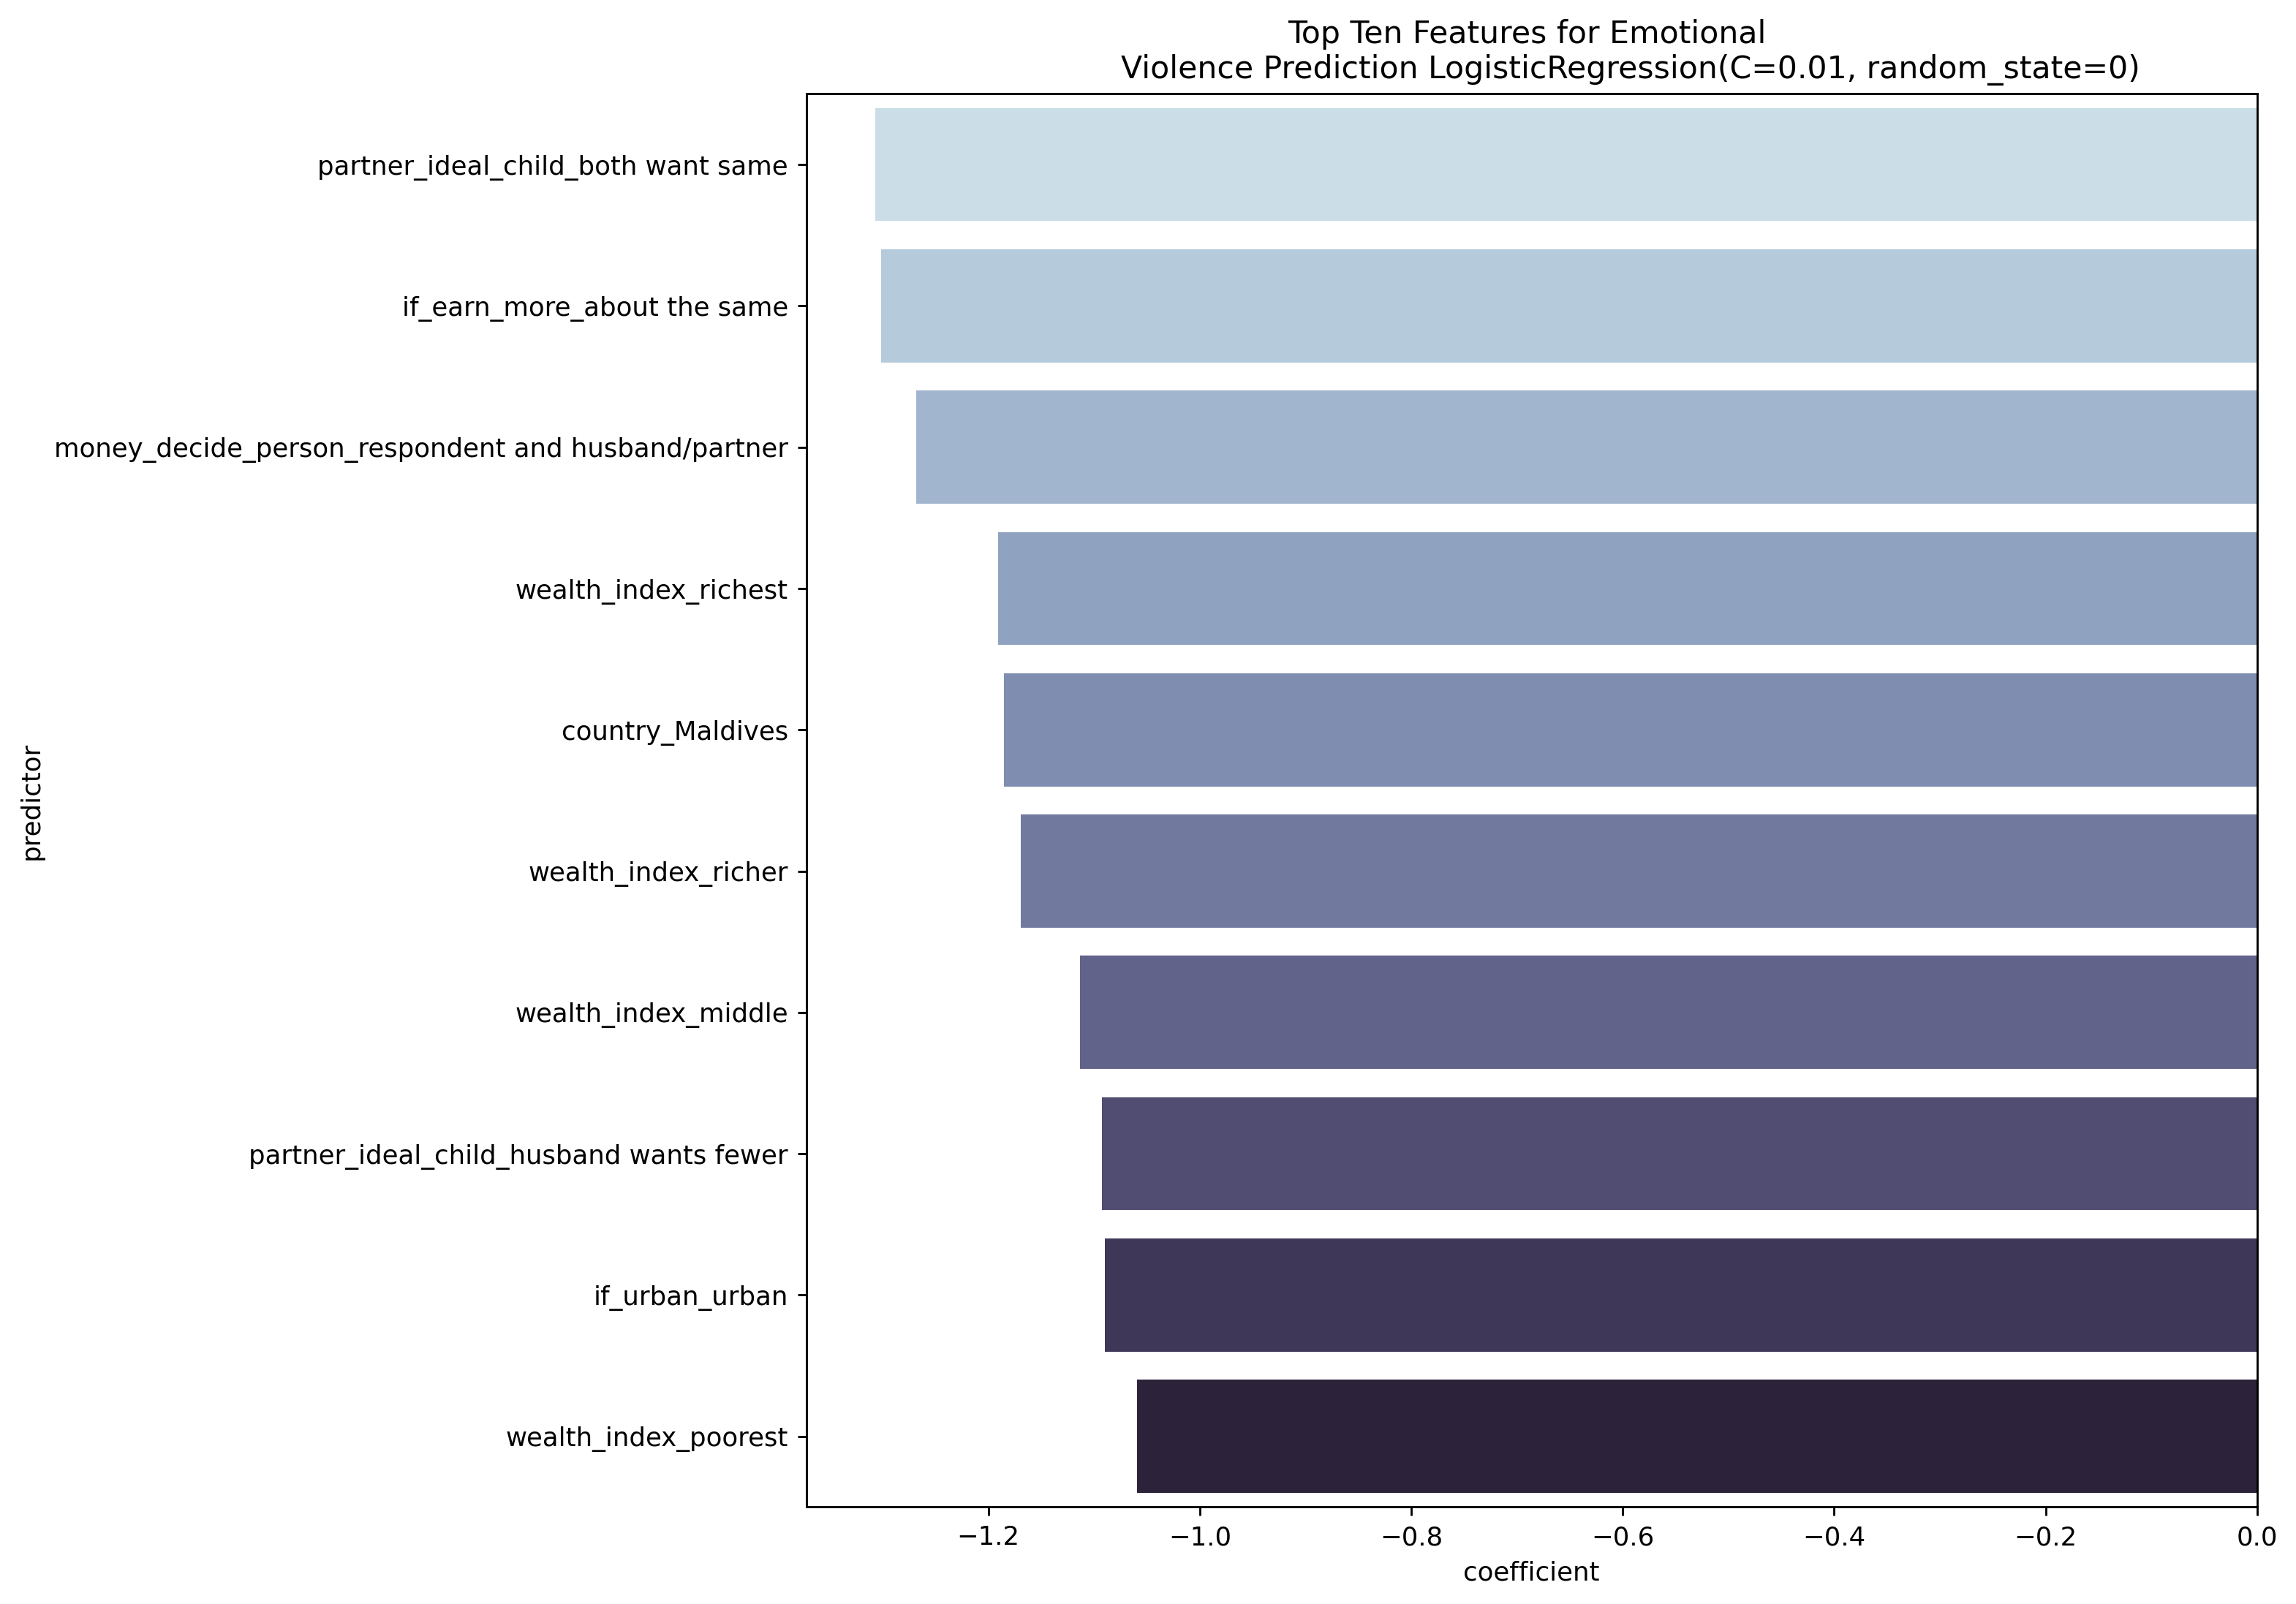

In [102]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'Cambodia', 'if_sex_vio','LR')

## Target 4: if have violence

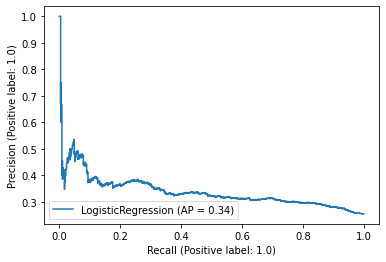

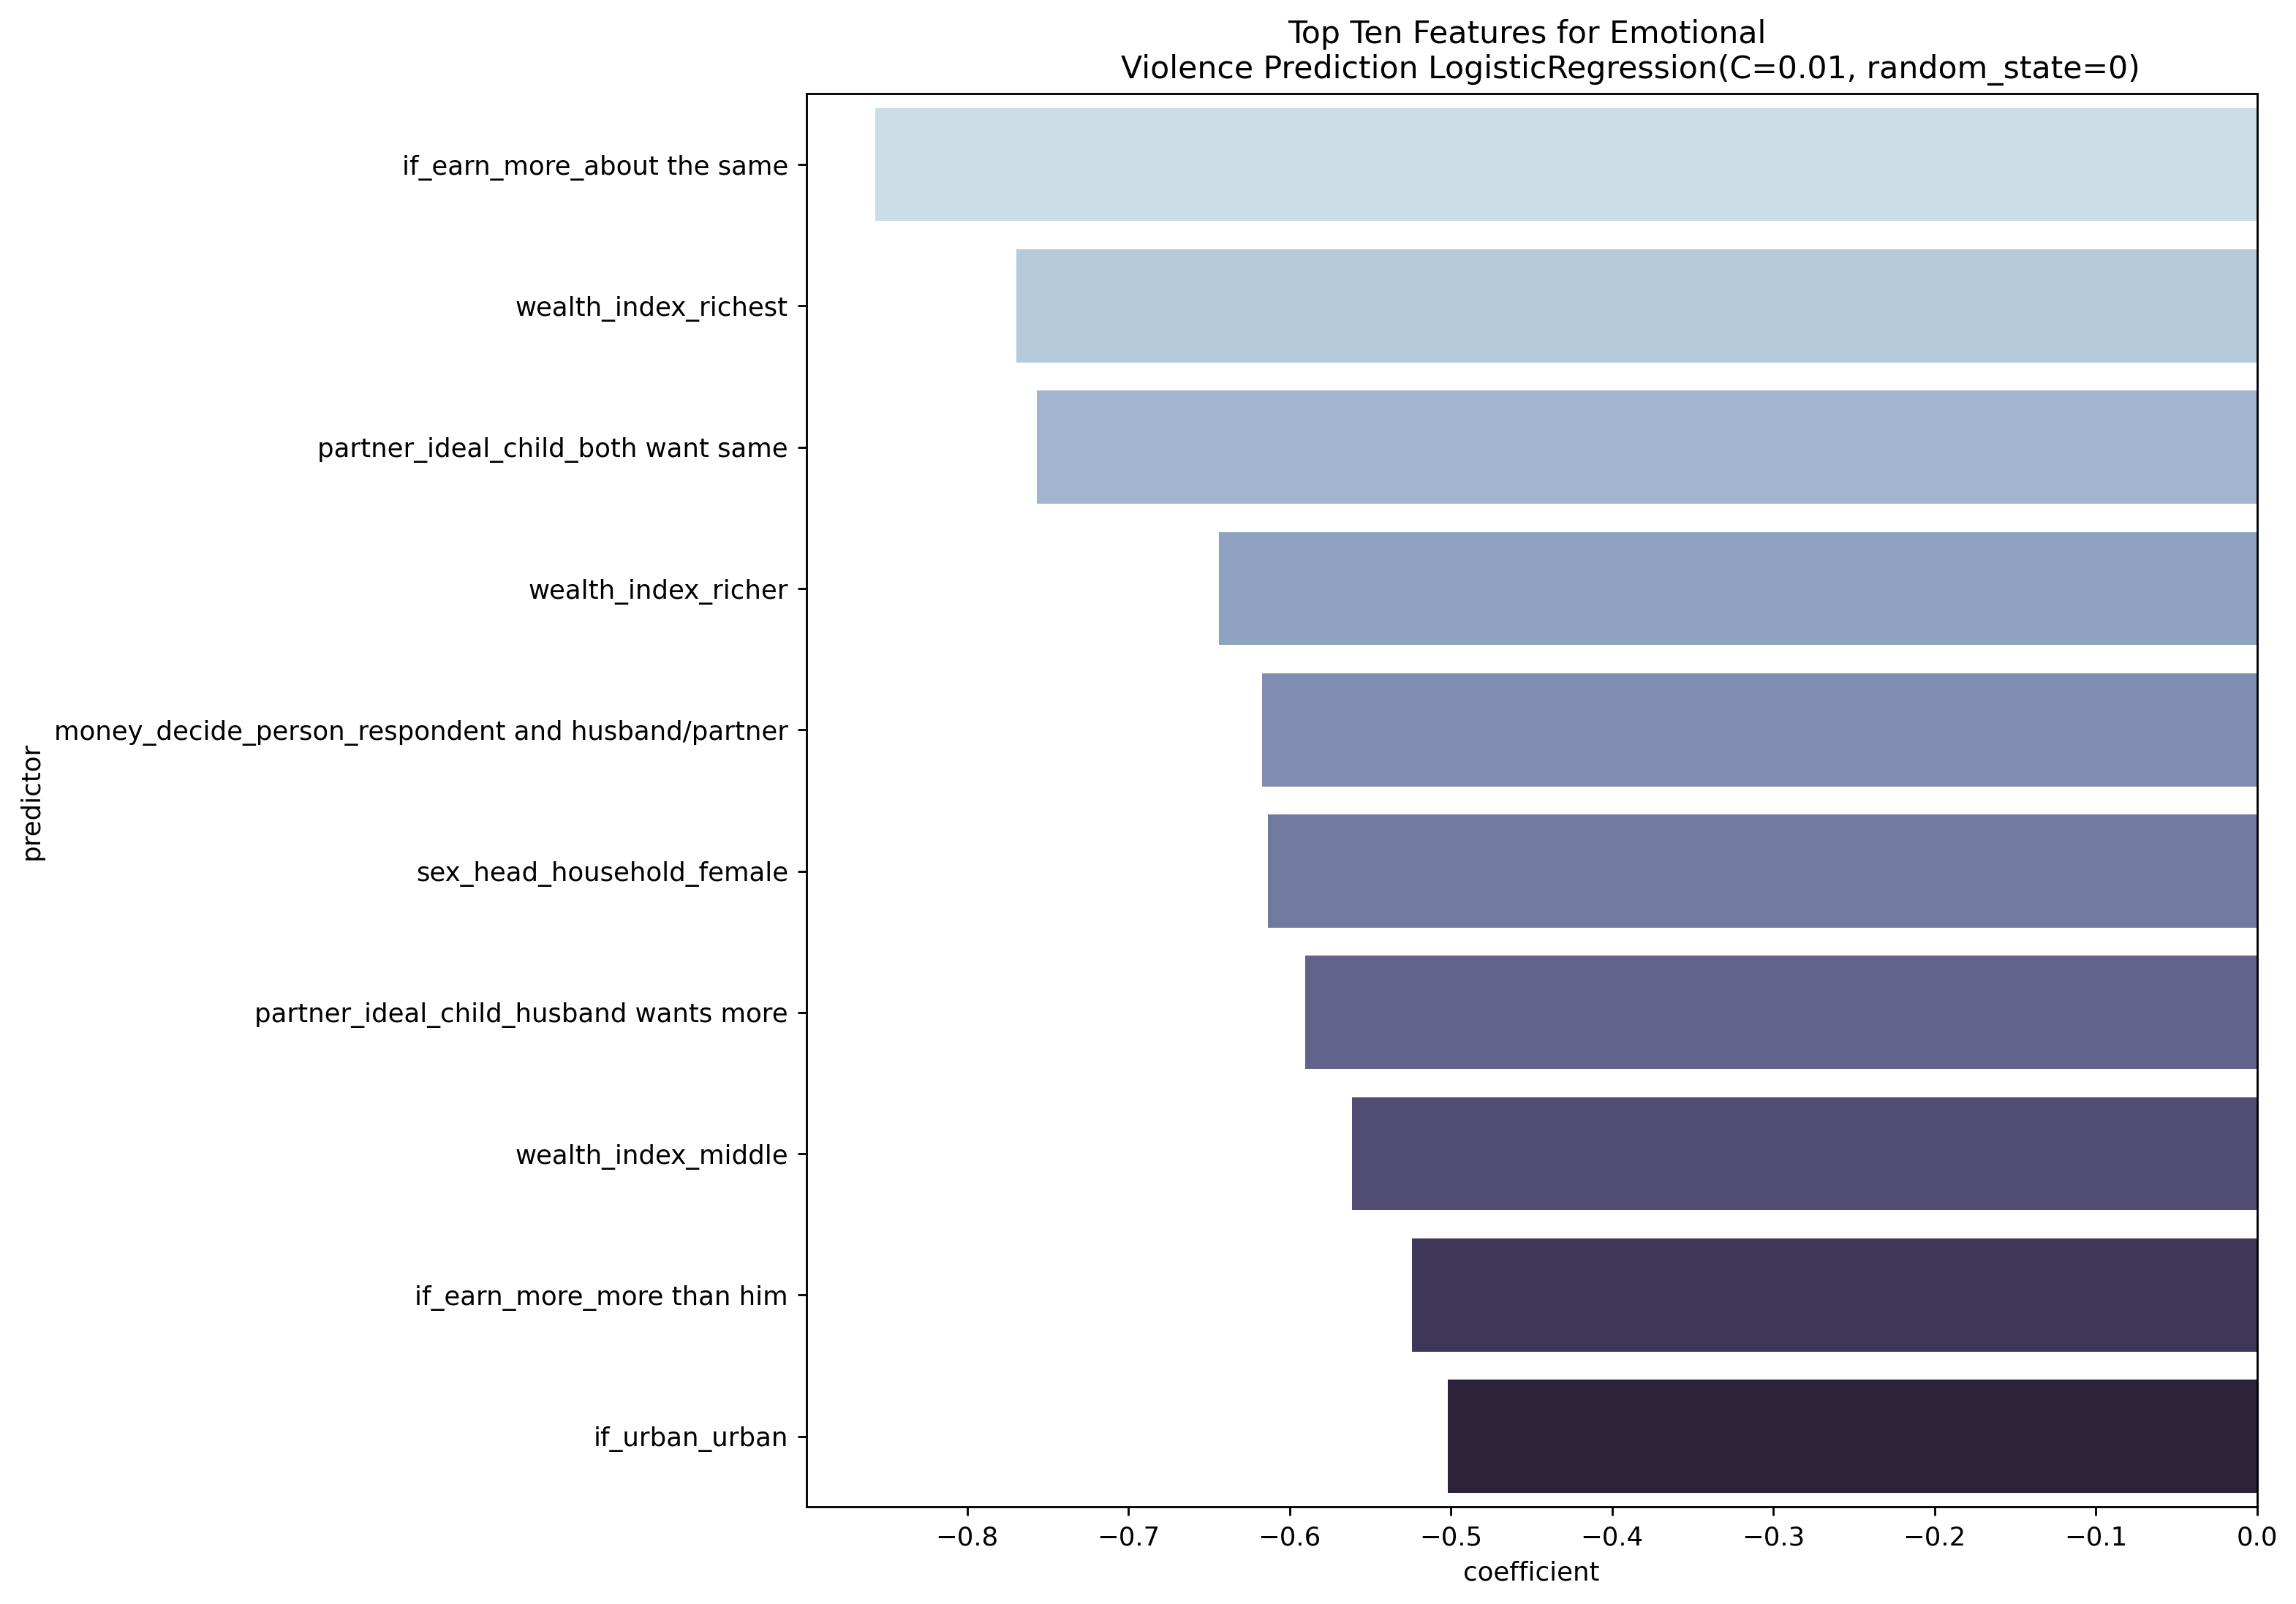

In [103]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train4, y_test4, 'Cambodia', 'if_sex_vio','LR')

# Analyze all countries by GaussianNB

In [63]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
        (df, features_col, target_col, dummy, need_one_hot, need_normalize, True)

In [64]:
y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4=\
        pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

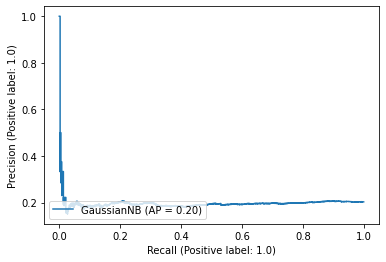

In [66]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train1, y_test1, 'All', 'if_emo_vil', 'NB')

In [67]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vil,GaussianNB,{},0.344359,0.484721,0.230253,0.695297,0.598869


In [68]:
eval

{'f1': 0.0,
 'accuracy': 0.7977099236641222,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

## Target 2: if have physical violence

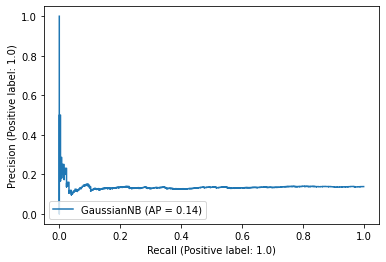

In [69]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'All', 'if_phy_vil', 'NB')

In [70]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,GaussianNB,{},0.254244,0.483212,0.156648,0.690662,0.614697


In [71]:
eval

{'f1': 0.0,
 'accuracy': 0.8625954198473282,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

## Target 3: if have sexual violence

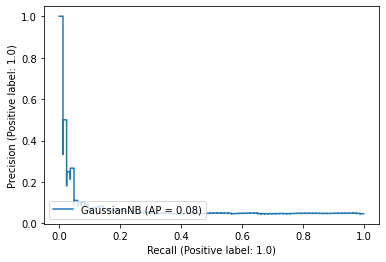

In [74]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_sex_vil', 'NB')

In [75]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vil,GaussianNB,{},0.089706,0.511046,0.048408,0.611453,0.59621


In [76]:
eval

{'f1': 0.0,
 'accuracy': 0.9547437295528899,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

## Target 4: if have violence

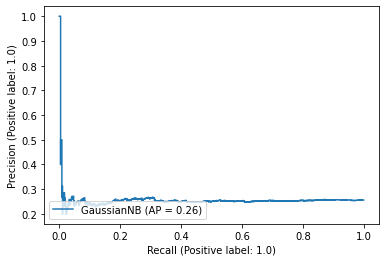

In [77]:
result, eval = pipeline_classification.analyze_country\
    (X_train, X_test, y_train4, y_test4, 'All', 'if_vil', 'NB')

In [78]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vil,GaussianNB,{},0.404043,0.507231,0.284862,0.696591,0.60888


In [79]:
eval

{'f1': 0.0,
 'accuracy': 0.7453653217011995,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}

# Analyze all countries by LinearSVC

In [80]:
X_train, X_test, y_train, y_test = pipeline_classification.prepare_data_contry\
        (df, features_col, target_col, dummy, need_one_hot, need_normalize, all=True)

In [81]:
y_train1, y_train2, y_train3, y_train4, y_test1, y_test2, y_test3, y_test4=\
        pipeline_classification.name_target(y_train, y_test)

## Target 1: if have emotional violence

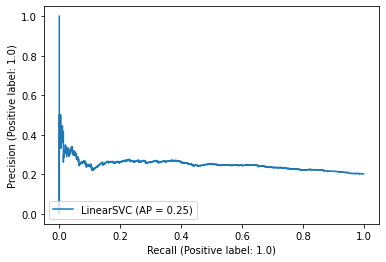

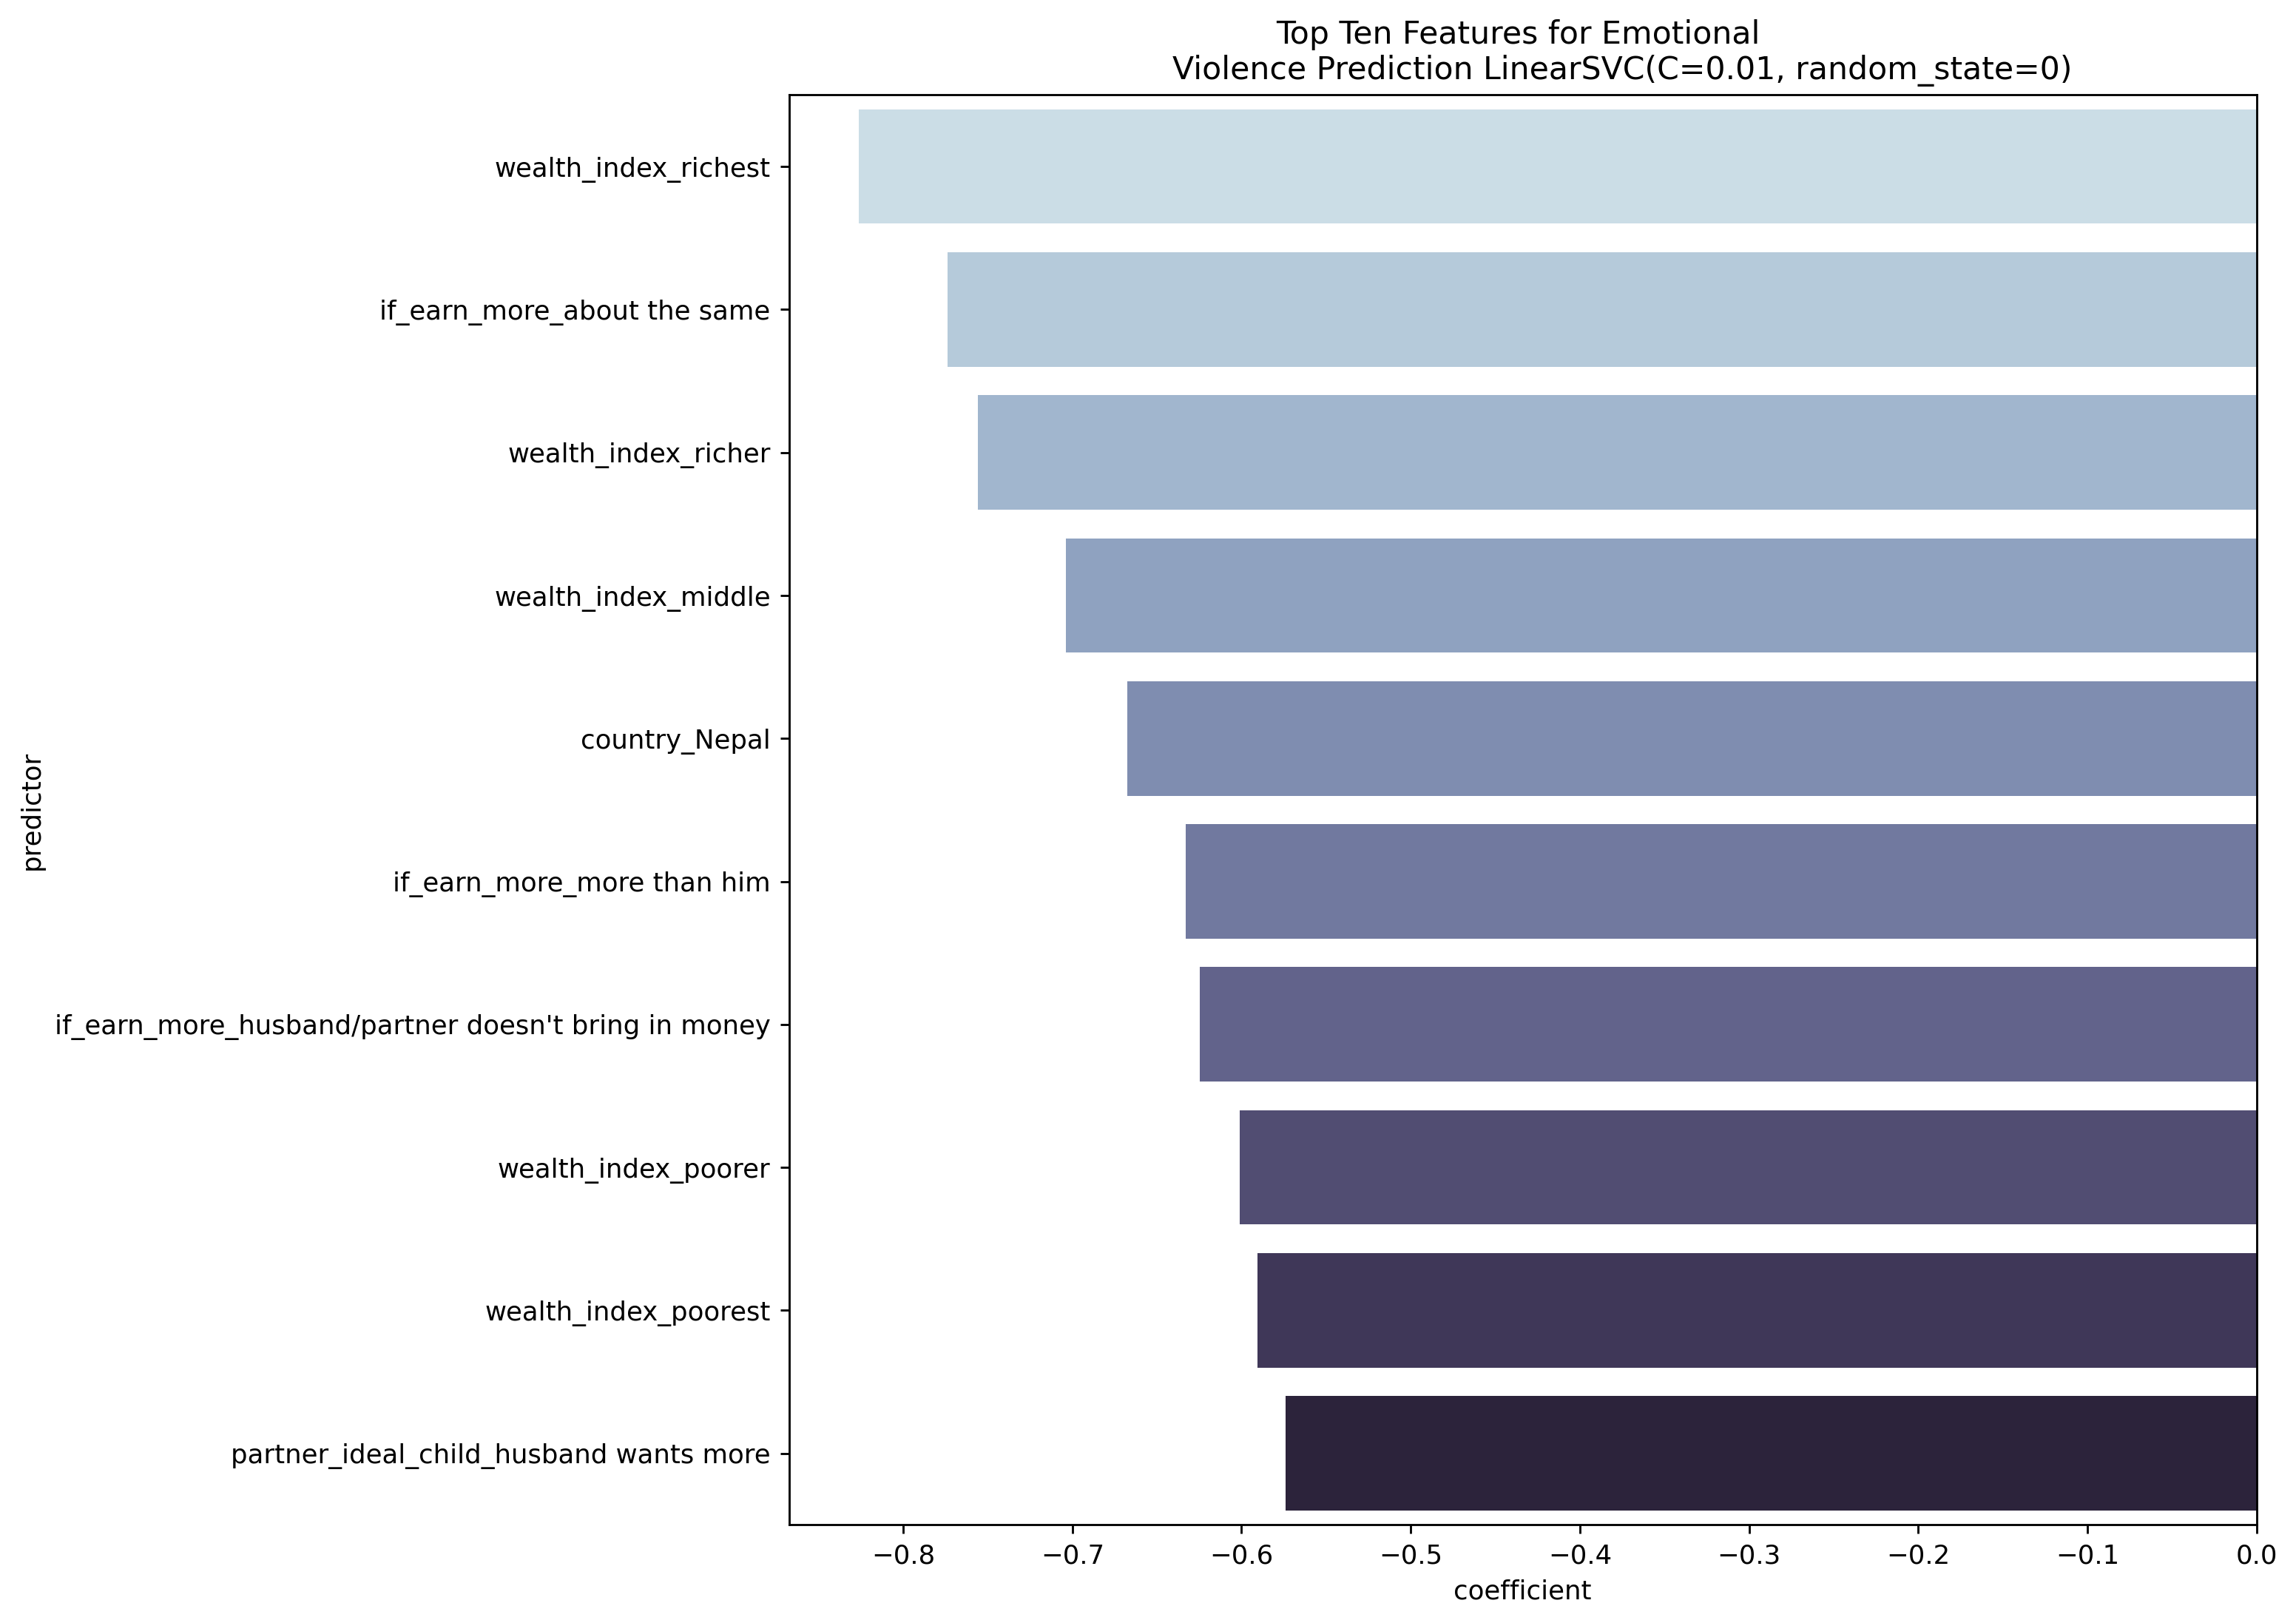

In [83]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train1, y_test1, 'All', 'if_emo_vil', 'SVC')

In [84]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_emo_vil,LinearSVC,{'linearsvc__C': 0.01},0.284070,0.740042,0.306769,0.265311,0.623553
1,All,if_emo_vil,LinearSVC,{'linearsvc__C': 0.1},0.155890,0.785731,0.336056,0.102034,0.622498
2,All,if_emo_vil,LinearSVC,{'linearsvc__C': 1},0.140826,0.788868,0.339473,0.089382,0.623184
3,All,if_emo_vil,LinearSVC,{'linearsvc__C': 10},0.150445,0.784094,0.327609,0.099961,0.624318
4,All,if_emo_vil,LinearSVC,{'linearsvc__C': 100},0.202090,0.749308,0.305435,0.175928,0.563317


## Target 2: if have physical violence

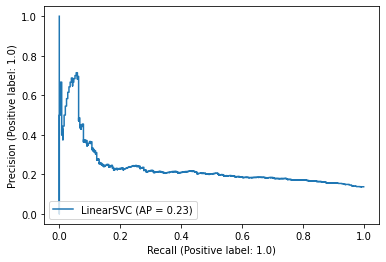

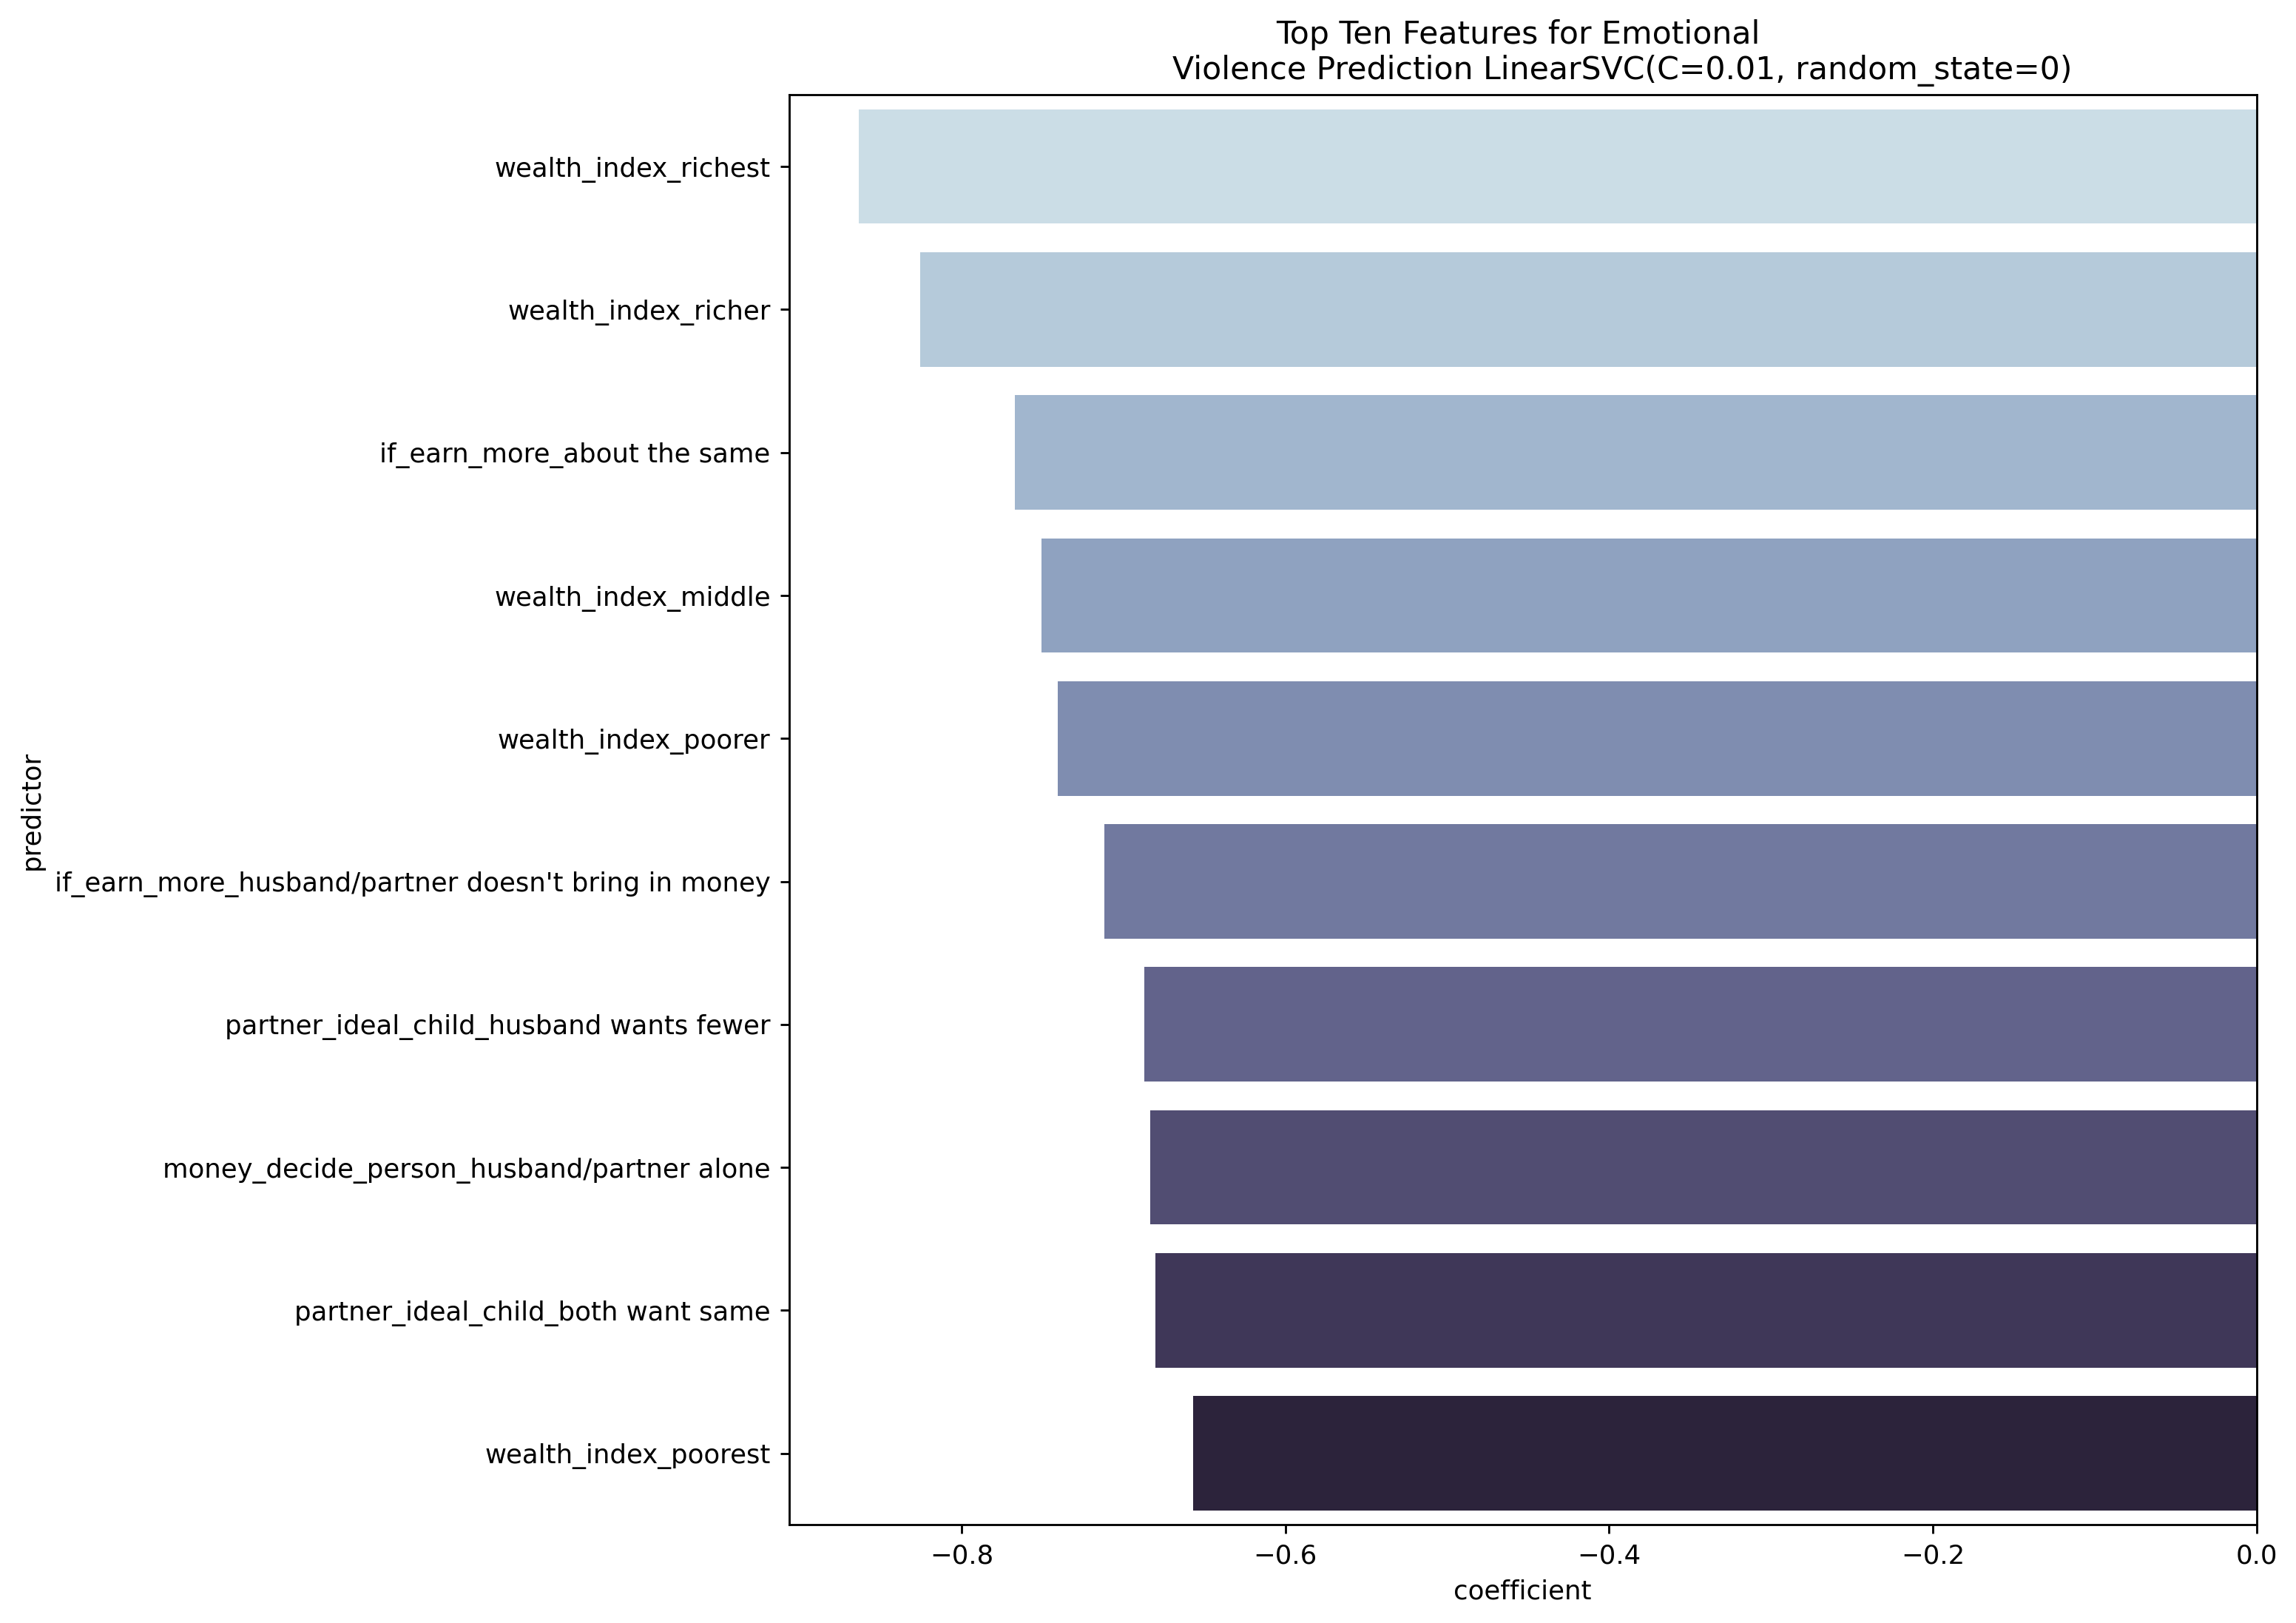

In [85]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train2, y_test2, 'All', 'if_phy_vil', 'SVC')

In [86]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.01},0.234163,0.835787,0.287785,0.198270,0.651454
1,All,if_phy_vil,LinearSVC,{'linearsvc__C': 0.1},0.089923,0.865248,0.311745,0.052782,0.649782
2,All,if_phy_vil,LinearSVC,{'linearsvc__C': 1},0.070160,0.866339,0.302145,0.039878,0.650377
3,All,if_phy_vil,LinearSVC,{'linearsvc__C': 10},0.102062,0.865249,0.344296,0.062436,0.648955
4,All,if_phy_vil,LinearSVC,{'linearsvc__C': 100},0.168740,0.809722,0.218707,0.194869,0.607856


## Target 3: if have sexual violence

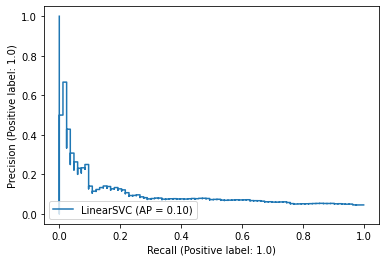

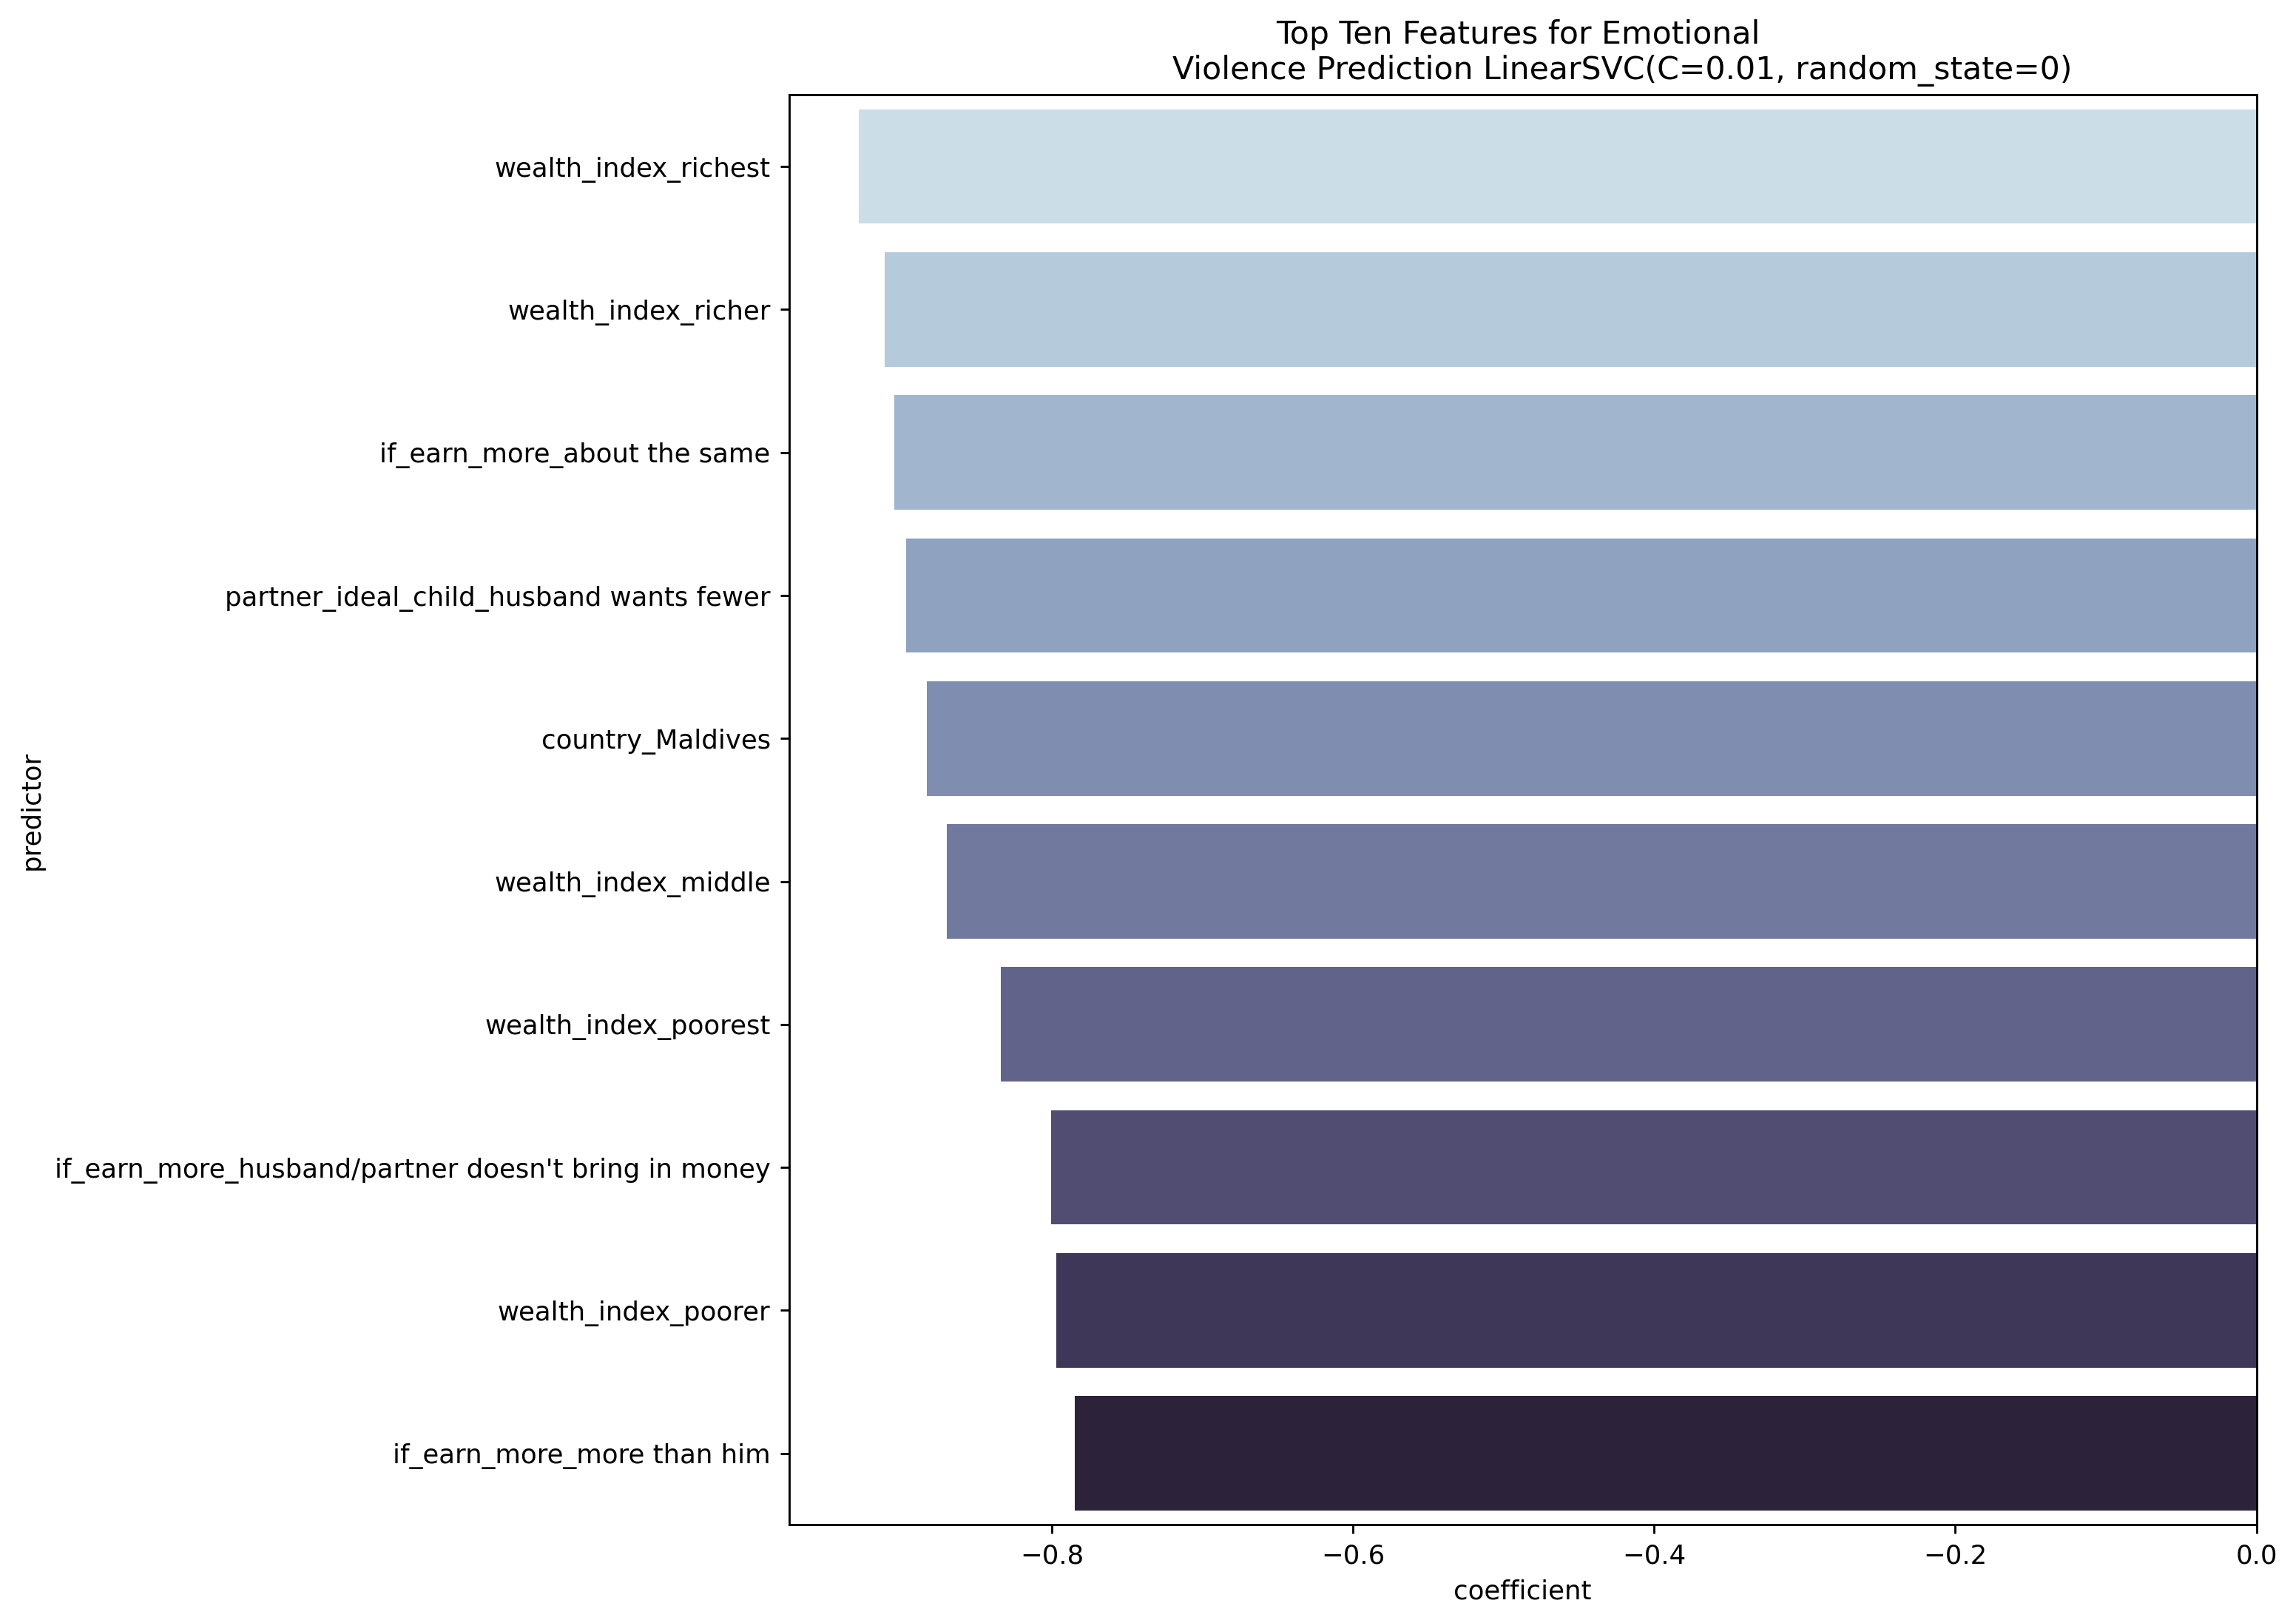

In [87]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_sex_vil', 'SVC')

In [88]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_sex_vil,LinearSVC,{'linearsvc__C': 0.01},0.077167,0.951036,0.162448,0.052094,0.650952
1,All,if_sex_vil,LinearSVC,{'linearsvc__C': 0.1},0.006667,0.960447,0.050000,0.003571,0.643840
2,All,if_sex_vil,LinearSVC,{'linearsvc__C': 1},0.000000,0.960447,0.000000,0.000000,0.641249
3,All,if_sex_vil,LinearSVC,{'linearsvc__C': 10},0.000000,0.960447,0.000000,0.000000,0.642142
4,All,if_sex_vil,LinearSVC,{'linearsvc__C': 100},0.029681,0.891344,0.018925,0.086330,0.521577


## Target 4: if have violence

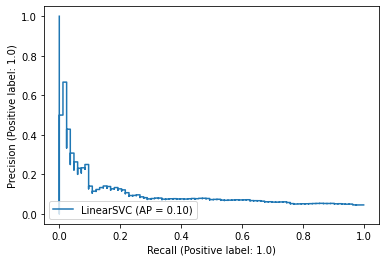

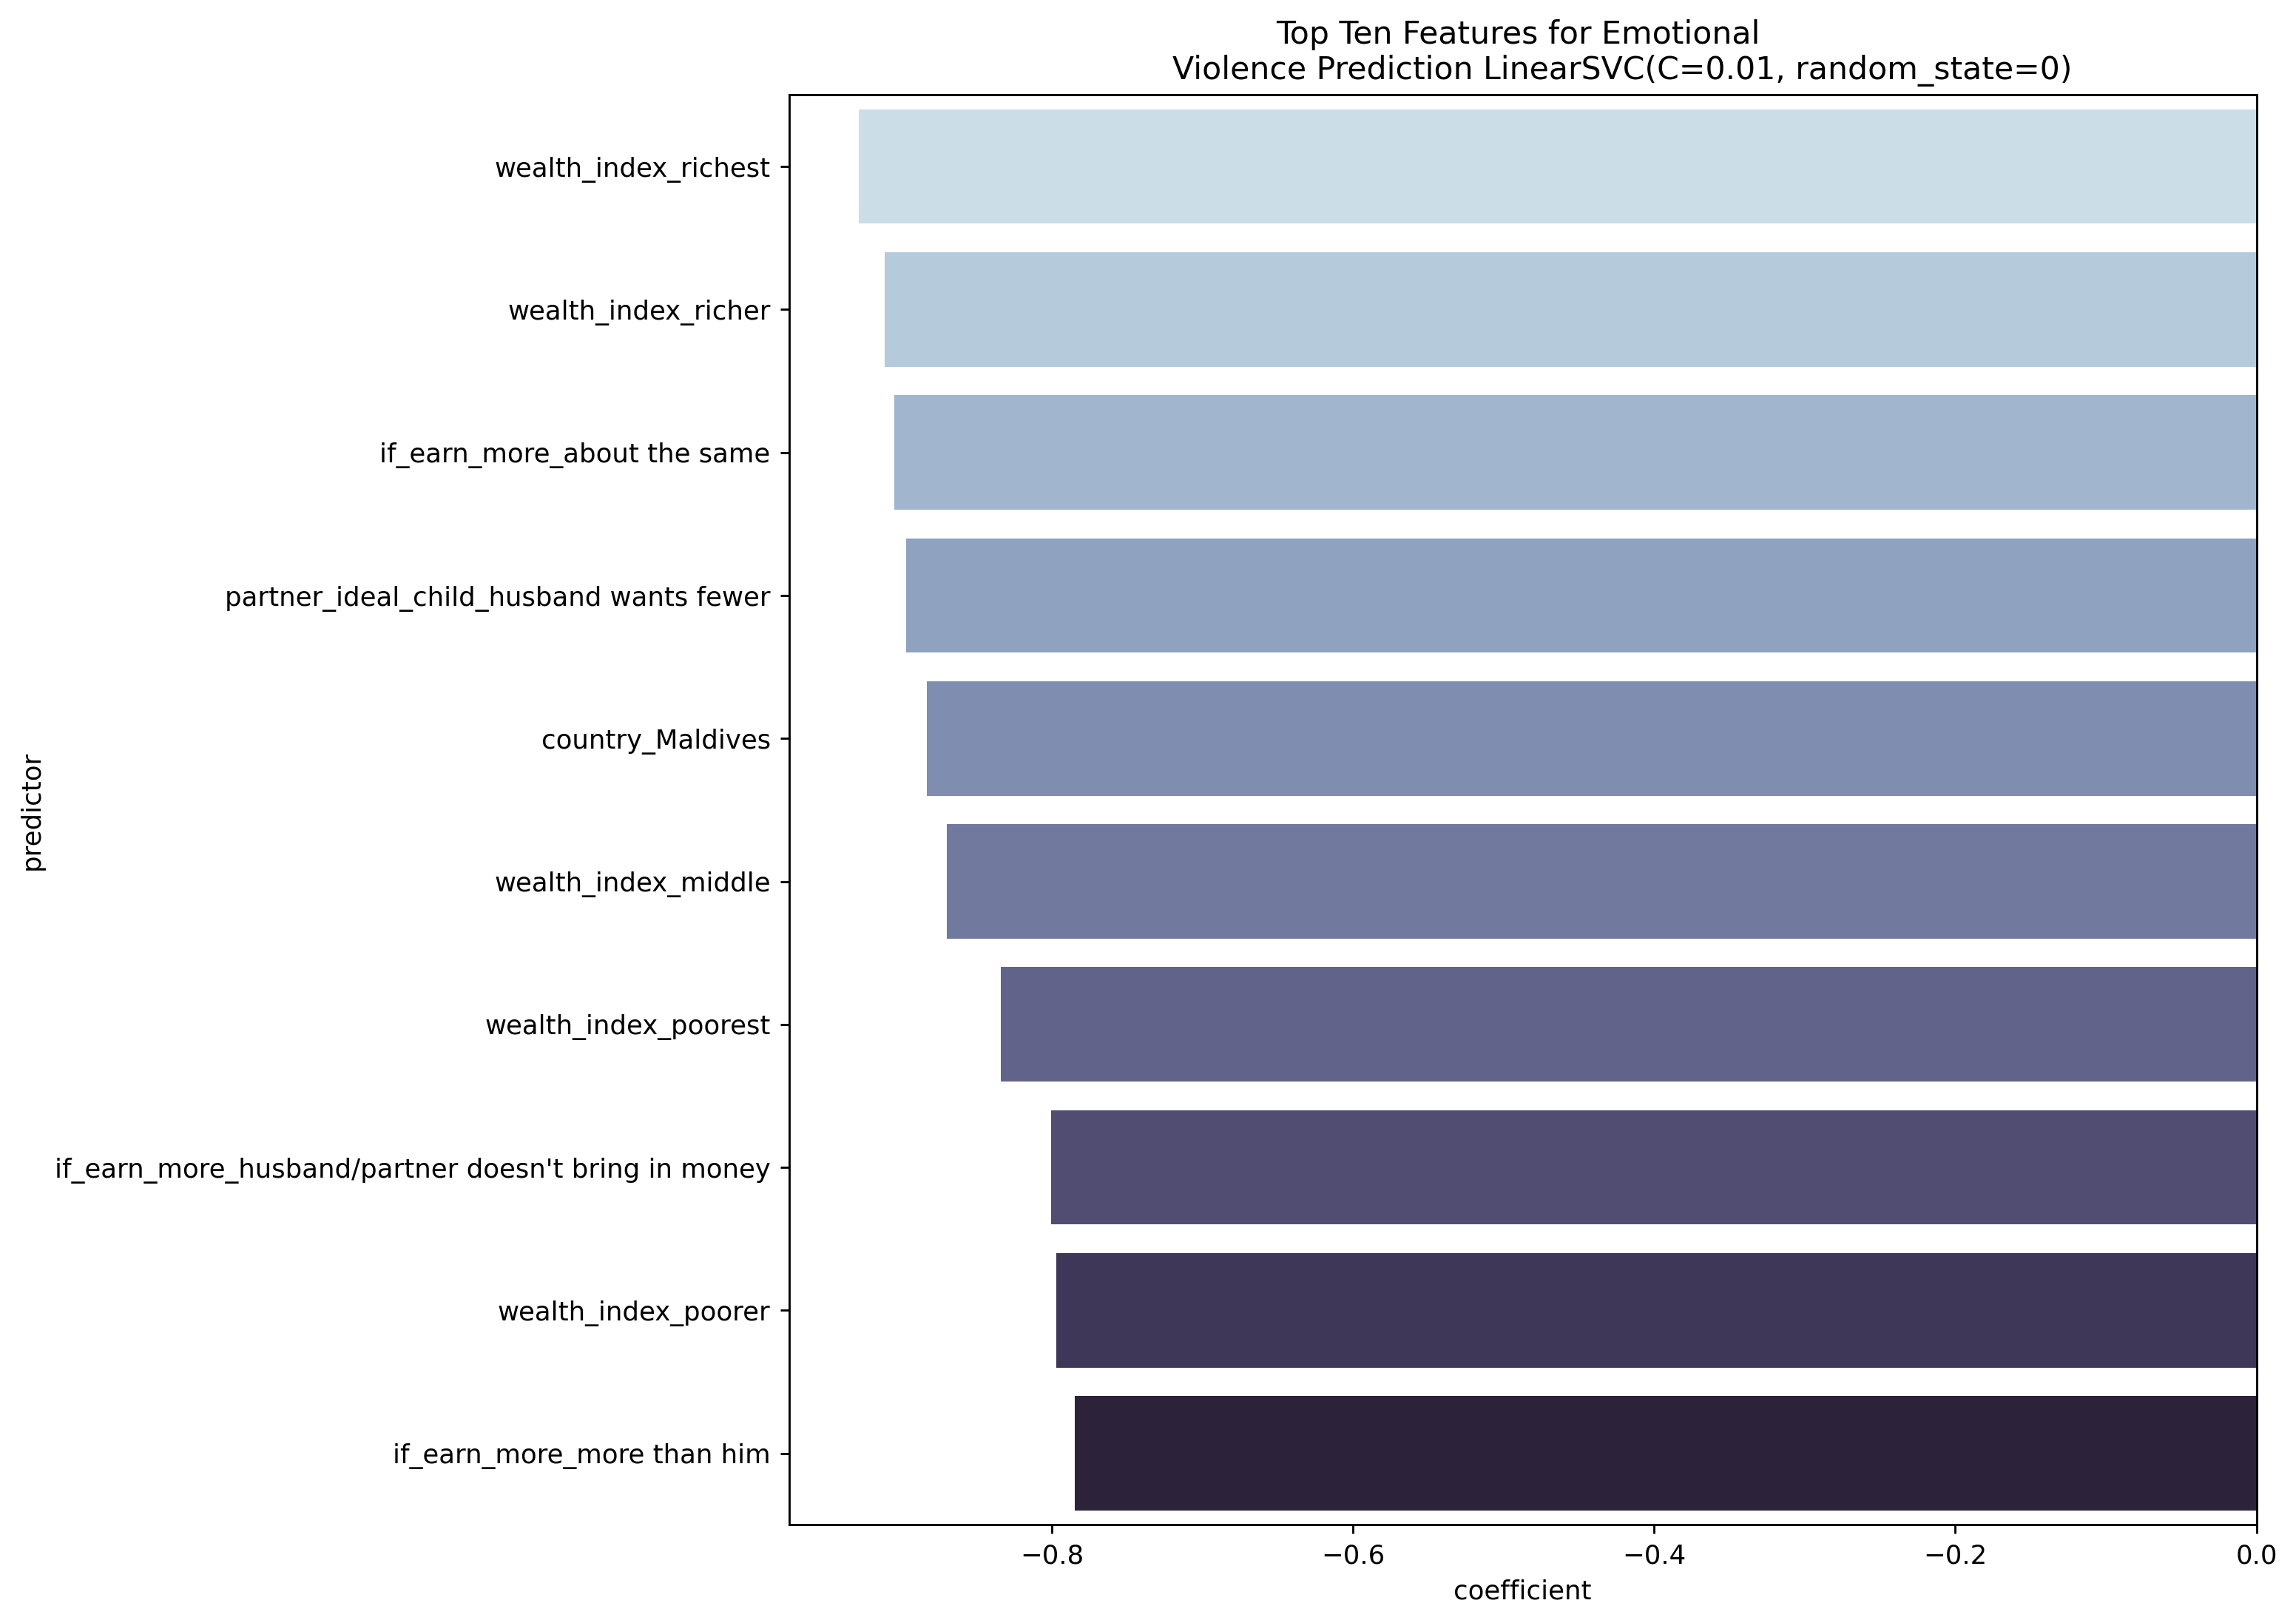

In [89]:
result, eval, coeffs = pipeline_classification.analyze_country\
    (X_train, X_test, y_train3, y_test3, 'All', 'if_vil', 'SVC')

In [90]:
result

,country,target,model,params,f1,accuracy,precision,recall,roc_auc
0,All,if_vil,LinearSVC,{'linearsvc__C': 0.01},0.077167,0.951036,0.162448,0.052094,0.650952
1,All,if_vil,LinearSVC,{'linearsvc__C': 0.1},0.006667,0.960447,0.050000,0.003571,0.643840
2,All,if_vil,LinearSVC,{'linearsvc__C': 1},0.000000,0.960447,0.000000,0.000000,0.641249
3,All,if_vil,LinearSVC,{'linearsvc__C': 10},0.000000,0.960447,0.000000,0.000000,0.642142
4,All,if_vil,LinearSVC,{'linearsvc__C': 100},0.029681,0.891344,0.018925,0.086330,0.521577


In [91]:
eval

{'f1': 0.0,
 'accuracy': 0.9547437295528899,
 'precision': 0.0,
 'recall': 0.0,
 'roc_auc': 0.5}